## Integrantes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from scipy.stats import mstats
import warnings; warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", 100)
sns.set_theme()


In [2]:
file_name = 'diabetes_proyecto.csv'
df = pd.read_csv(file_name)

# EDA

In [3]:

print("Forma del dataset:", df.shape)
print("\nTipos de datos:\n", df.dtypes.value_counts())

display(df.head(3))
print("\n.info():")
df.info()

# Columnas num√©ricas y categ√≥ricas
num_cols = df.select_dtypes(include=["number"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
print(f"\nNum√©ricas ({len(num_cols)}):", num_cols[:20], "..." if len(num_cols)>20 else "")
print(f"Categ√≥ricas ({len(cat_cols)}):", cat_cols[:20], "..." if len(cat_cols)>20 else "")


Forma del dataset: (144641, 14)

Tipos de datos:
 int64      5
float64    5
object     4
Name: count, dtype: int64


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0             72             35      0.0  33.6   
1            1     85.0             66             29      0.0  26.6   
2            8    183.0             64              0      0.0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  Lifestyle  DietType SmokingStatus  \
0                     0.627   50        1     Active  Balanced    Non-Smoker   
1                     0.351   31        0     Active  Balanced        Smoker   
2                     0.672   32        1  Sedentary  Balanced    Non-Smoker   

  FamilyHistory  StressLevel  
0           Yes         8.29  
1            No         3.59  
2           Yes         1.73


.info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144641 entries, 0 to 144640
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Pregnancies               144641 non-null  int64  
 1   Glucose                   140290 non-null  float64
 2   BloodPressure             144641 non-null  int64  
 3   SkinThickness             144641 non-null  int64  
 4   Insulin                   143200 non-null  float64
 5   BMI                       144641 non-null  float64
 6   DiabetesPedigreeFunction  144641 non-null  float64
 7   Age                       144641 non-null  int64  
 8   Outcome                   144641 non-null  int64  
 9   Lifestyle                 144641 non-null  object 
 10  DietType                  144640 non-null  object 
 11  SmokingStatus             144640 non-null  object 
 12  FamilyHistory             144640 non-null  object 
 13  StressLevel               137381 n

In [4]:

nulos = df.isna().sum().sort_values(ascending=False)
pct_nulos = (df.isna().mean()*100).sort_values(ascending=False)
nul_table = pd.DataFrame({"nulos": nulos, "%nulos": pct_nulos})
display(nul_table[nul_table["nulos"]>0])

dup_count = df.duplicated().sum()
print(f"\nFilas duplicadas: {dup_count}")


nulos    %nulos
StressLevel     7260  5.019324
Glucose         4351  3.008137
Insulin         1441  0.996260
SmokingStatus      1  0.000691
FamilyHistory      1  0.000691
DietType           1  0.000691


Filas duplicadas: 1237


In [5]:

if num_cols:
    display(df[num_cols].describe().T.assign(iqr=lambda d: d["75%"]-d["25%"]))
if cat_cols:
    display(df[cat_cols].describe(include="all").T)


count        mean         std     min     25%  \
Pregnancies               144641.0    3.837702    3.366041   0.000   1.000   
Glucose                   140290.0  120.966562   32.086517   0.000  99.000   
BloodPressure             144641.0   69.132452   19.260695   0.000  62.000   
SkinThickness             144641.0   20.559800   15.983580   0.000   0.000   
Insulin                   143200.0   80.047989  115.875462   0.000   0.000   
BMI                       144641.0   32.003075    7.902904   0.000  27.300   
DiabetesPedigreeFunction  144641.0    0.473241    0.332653   0.078   0.244   
Age                       144641.0   33.248906   11.736519  21.000  24.000   
Outcome                   144641.0    0.200324    0.400244   0.000   0.000   
StressLevel               137381.0    4.999093    1.997798  -4.580   3.650   

                              50%      75%     max      iqr  
Pregnancies                 3.000    6.000   17.00    5.000  
Glucose                   117.000  141.000  199.00   42.000  
BloodPressure              72.000   80.000  122.00   18.000  
SkinThickness              23.000   32.000   99.00   32.000  
Insulin                    29.000  128.000  846.00  128.000  
BMI                        32.000   36.600   67.10    9.300  
DiabetesPedigreeFunction    0.375    0.629    2.42    0.385  
Age                        29.000   41.000   81.00   17.000  
Outcome                     0.000    0.000    1.00    0.000  
StressLevel                 5.000    6.350   13.99    2.700

count unique         top   freq
Lifestyle      144641      3   Sedentary  72377
DietType       144640      3     LowCarb  48625
SmokingStatus  144640      2  Non-Smoker  72576
FamilyHistory  144640      2         Yes  72537

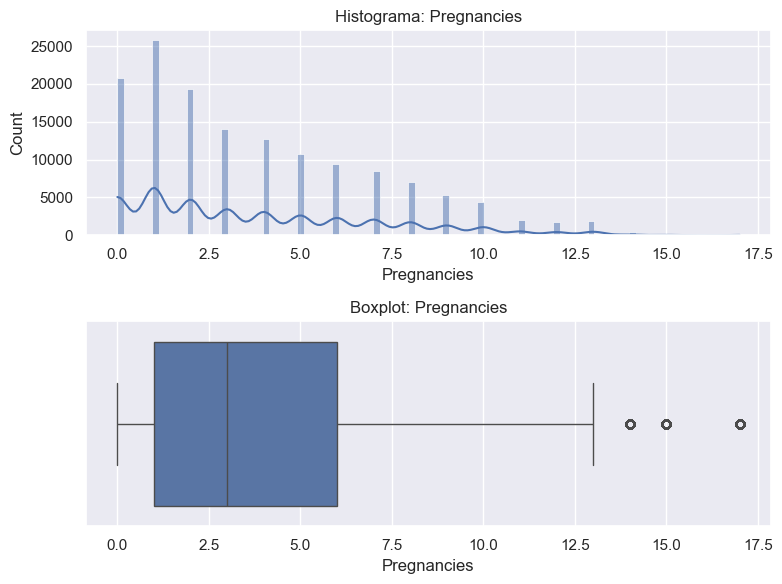

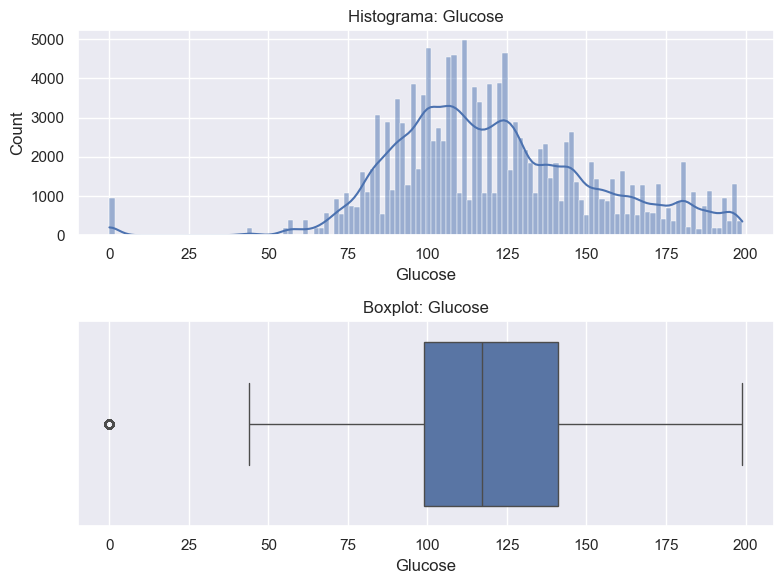

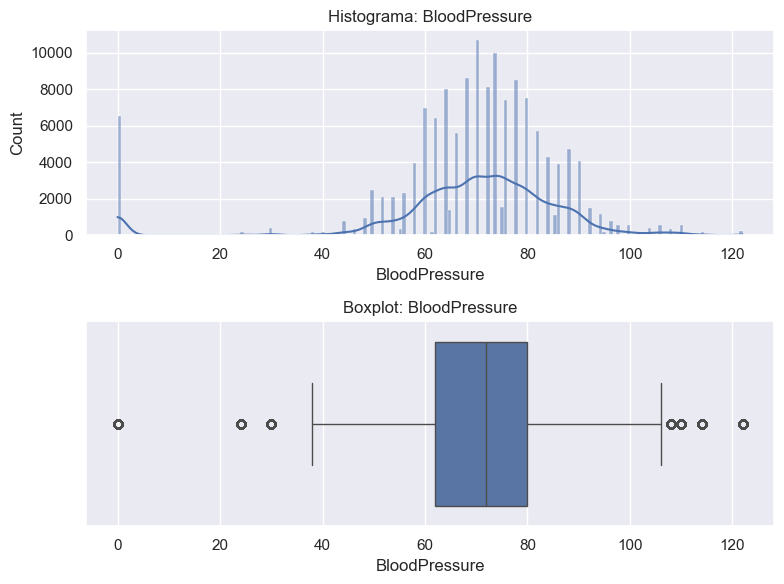

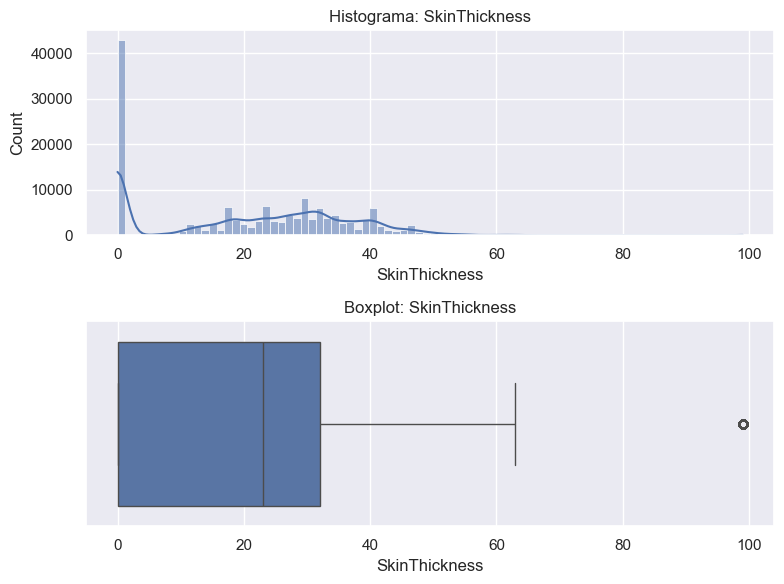

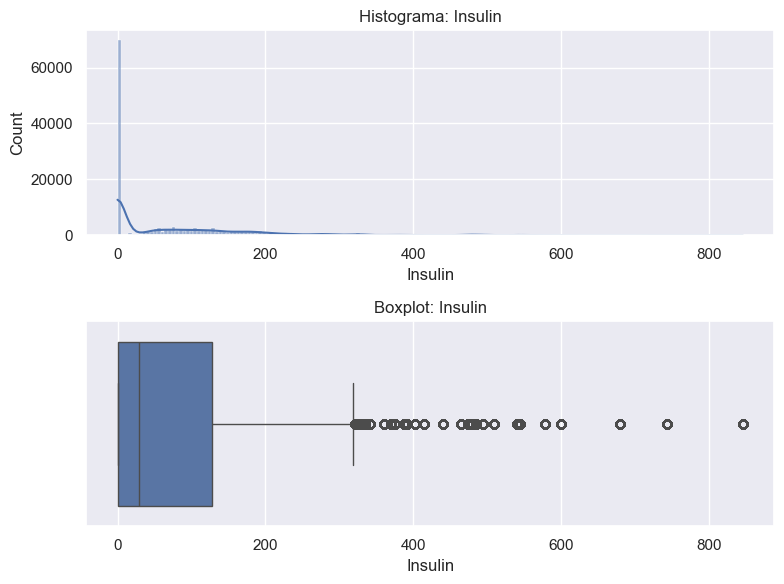

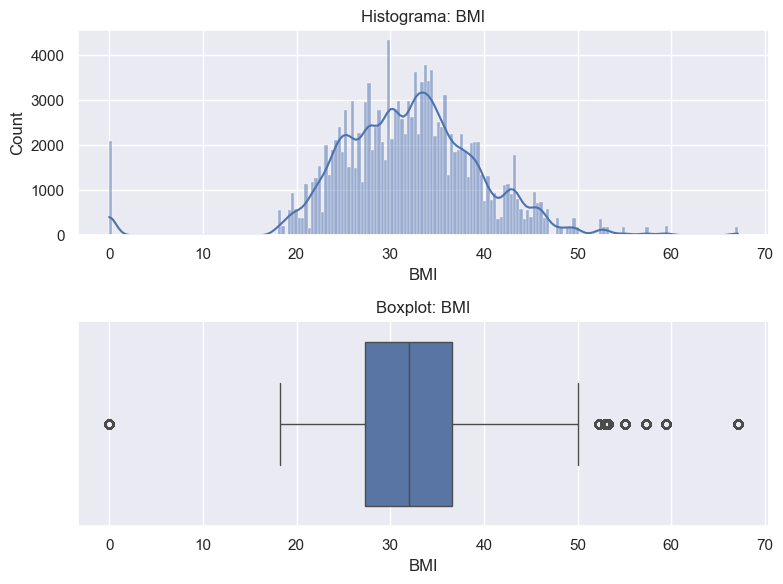

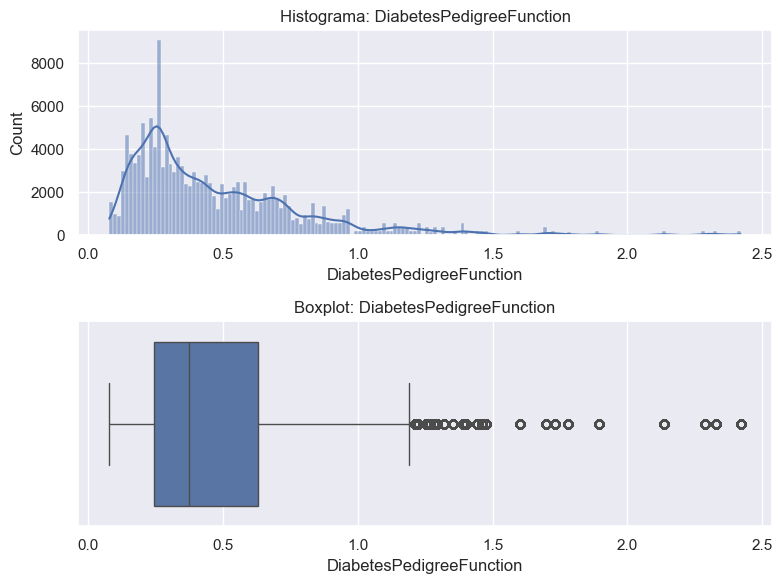

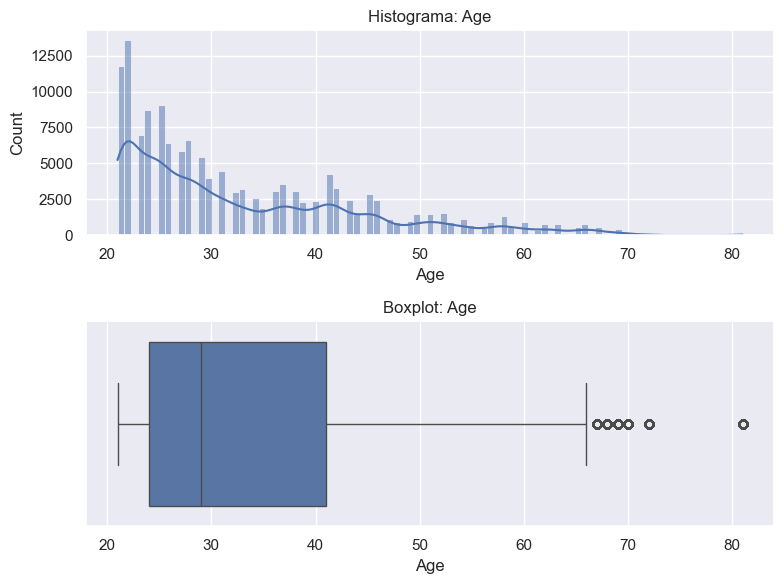

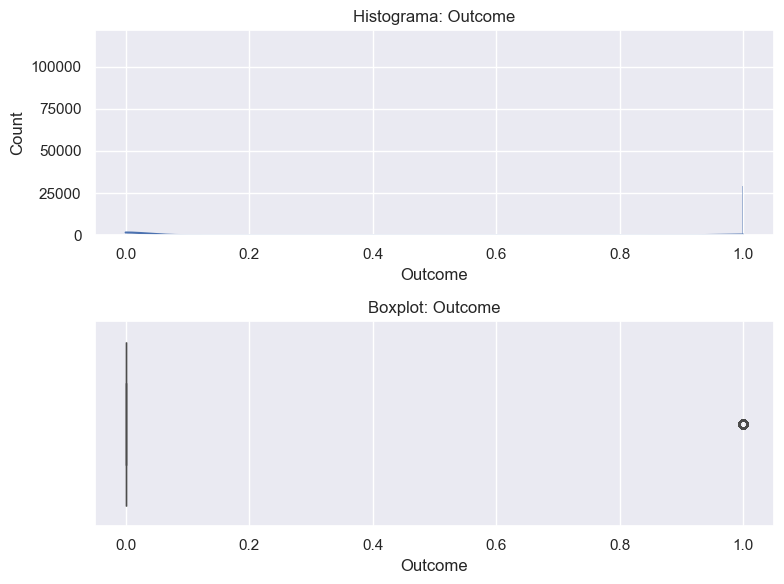

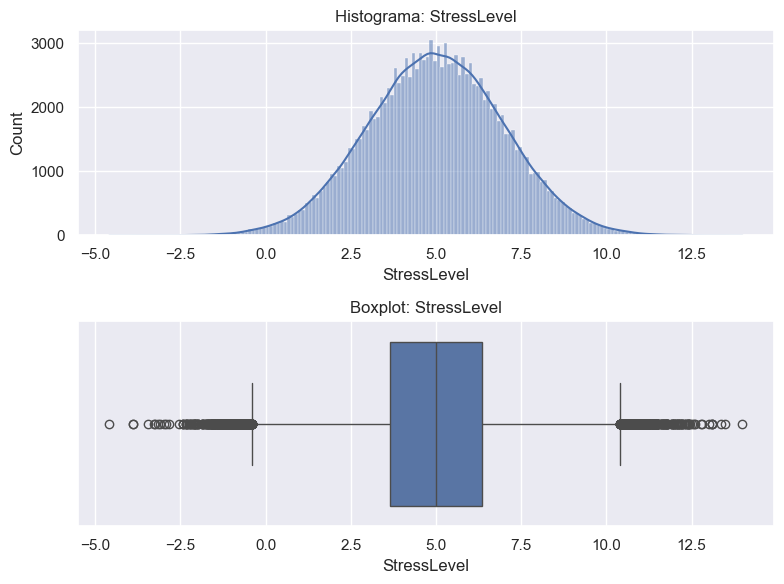

In [6]:

cols = num_cols[:10]  # limita para no saturar el notebook (ajusta si quieres)
for c in cols:
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    sns.histplot(df[c].dropna(), kde=True, ax=ax[0])
    ax[0].set_title(f"Histograma: {c}")
    sns.boxplot(x=df[c], ax=ax[1])
    ax[1].set_title(f"Boxplot: {c}")
    plt.tight_layout()
    plt.show()



Lifestyle ‚Äî cardinalidad: 3


conteo
Lifestyle        
Sedentary   72377
Active      72263
Seden           1

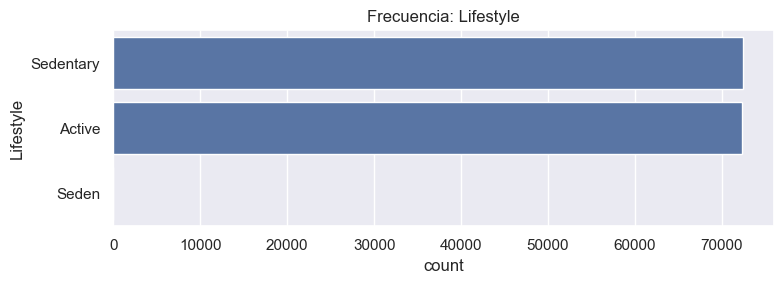


DietType ‚Äî cardinalidad: 3


conteo
DietType        
LowCarb    48625
HighCarb   48227
Balanced   47788
NaN            1

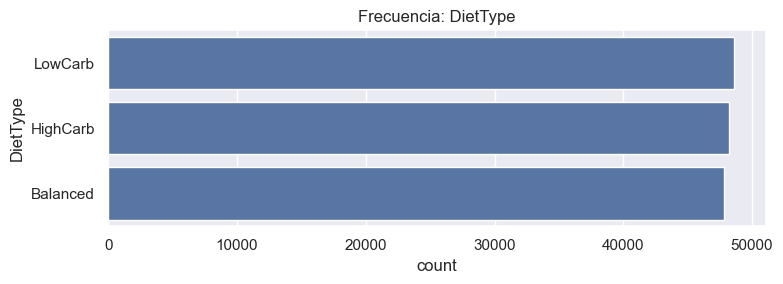


SmokingStatus ‚Äî cardinalidad: 2


conteo
SmokingStatus        
Non-Smoker      72576
Smoker          72064
NaN                 1

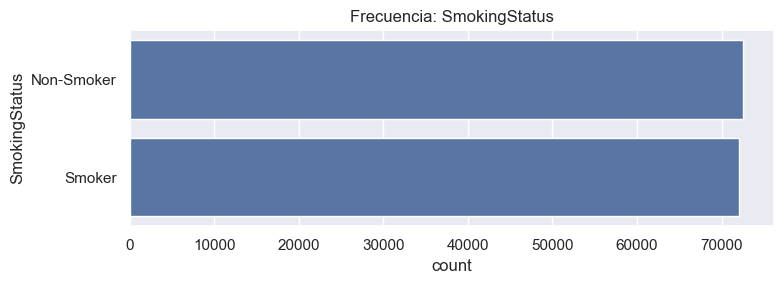


FamilyHistory ‚Äî cardinalidad: 2


conteo
FamilyHistory        
Yes             72537
No              72103
NaN                 1

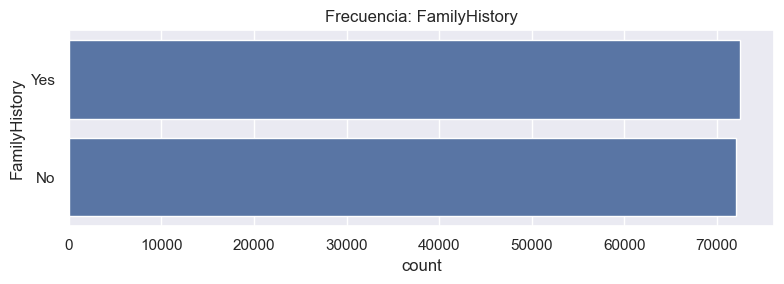

In [7]:

cols = cat_cols[:10]
for c in cols:
    print(f"\n{c} ‚Äî cardinalidad: {df[c].nunique()}")
    display(df[c].value_counts(dropna=False).to_frame("conteo"))
    plt.figure(figsize=(8,3))
    sns.countplot(y=c, data=df, order=df[c].value_counts().index)
    plt.title(f"Frecuencia: {c}")
    plt.tight_layout()
    plt.show()


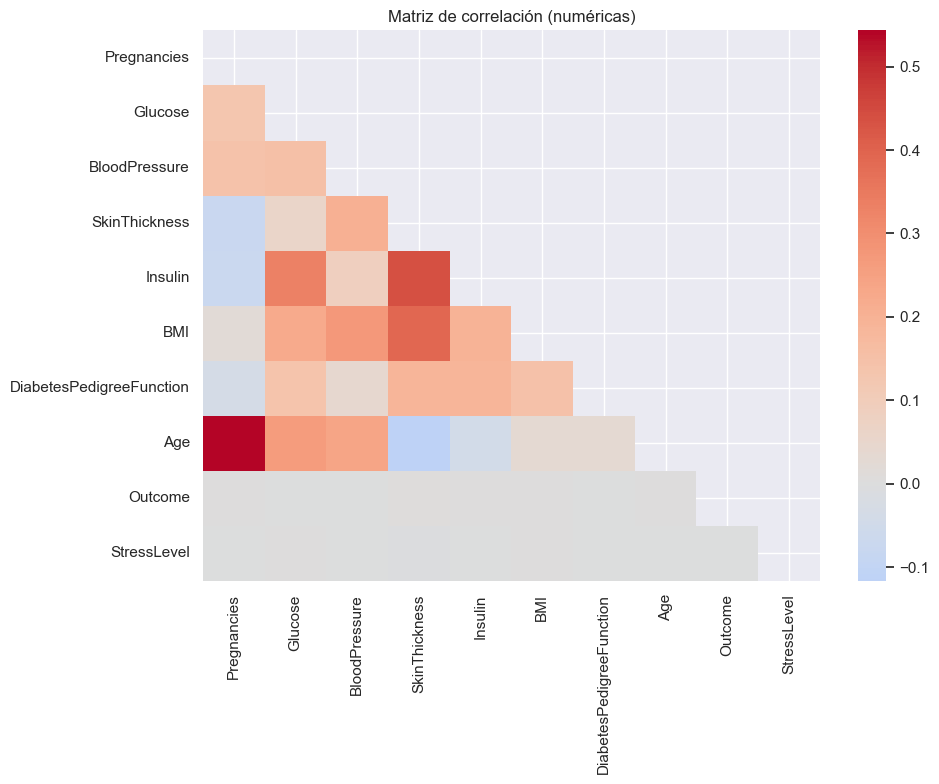


Pares m√°s correlacionados (|r|>0.6):
No hay pares con |r| > 0.6.


In [8]:

if len(num_cols) >= 2:
    corr = df[num_cols].corr(numeric_only=True)

    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr, dtype=bool))
    sns.heatmap(corr, mask=mask, annot=False, cmap="coolwarm", center=0)
    plt.title("Matriz de correlaci√≥n (num√©ricas)")
    plt.tight_layout()
    plt.show()

    print("\nPares m√°s correlacionados (|r|>0.6):")
    # Tomar solo la parte superior de la matriz (sin duplicados ni diagonal)
    upper = np.triu(np.ones(corr.shape), k=1).astype(bool)
    pairs = corr.where(upper).stack().rename("r")

    # Ordenar por |r| de mayor a menor (conservando el signo)
    pairs = pairs.loc[pairs.abs().sort_values(ascending=False).index]

    # Filtrar por umbral y mostrar
    top = pairs[pairs.abs() > 0.6]
    if not top.empty:
        display(top.to_frame())
    else:
        print("No hay pares con |r| > 0.6.")



# Post Procesamiento

In [9]:
y = df['Outcome']
y.info()
df = pd.concat([df, pd.get_dummies(df['Lifestyle'], dtype=int)], axis=1).drop(columns=['Lifestyle'])
df = pd.concat([df, pd.get_dummies(df['DietType'], dtype=int)], axis=1).drop(columns=['DietType'])
df = pd.concat([df, pd.get_dummies(df['SmokingStatus'], dtype=int)], axis=1).drop(columns=['SmokingStatus'])
df = pd.concat([df, pd.get_dummies(df['FamilyHistory'], dtype=int)], axis=1).drop(columns=['FamilyHistory'])
df.head()


<class 'pandas.core.series.Series'>
RangeIndex: 144641 entries, 0 to 144640
Series name: Outcome
Non-Null Count   Dtype
--------------   -----
144641 non-null  int64
dtypes: int64(1)
memory usage: 1.1 MB


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0             72             35      0.0  33.6   
1            1     85.0             66             29      0.0  26.6   
2            8    183.0             64              0      0.0  23.3   
3            1     89.0             66             23     94.0  28.1   
4            0    137.0             40             35    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  StressLevel  Active  Seden  \
0                     0.627   50        1         8.29       1      0   
1                     0.351   31        0         3.59       1      0   
2                     0.672   32        1         1.73       0      0   
3                     0.167   21        0         6.22       0      0   
4                     2.288   33        1         6.79       1      0   

   Sedentary  Balanced  HighCarb  LowCarb  Non-Smoker  Smoker  No  Yes  
0          0         1         0        0           1       0   0    1  
1          0         1         0        0           0       1   1    0  
2          1         1         0        0           1       0   0    1  
3          1         1         0        0           1       0   1    0  
4          0         0         0        1           1       0   0    1

In [ ]:

# ==================== PREPROCESAMIENTO COLUMNA POR COLUMNA ====================
# Basado en el estilo del notebook: imputaci√≥n con SimpleImputer(strategy='most_frequent'),
# conversi√≥n num√©rica con errors='coerce', winsorizaci√≥n de extremos (1% por cola),
# y visualizaci√≥n con histogramas y boxplots. No se crean features nuevas ni se eliminan filas.

from sklearn.impute import SimpleImputer
from scipy.stats import mstats
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un dataframe procesado independiente desde el df con dummies
df_proc = df.copy()

# Separar target si existe en columnas
target_col = 'Outcome' if 'Outcome' in df_proc.columns else None
if target_col is not None:
    y = df_proc[target_col]
else:
    y = None

print("Resumen inicial (df_proc):")
print(df_proc.info())
print(df_proc.head())
print("-"*100)

# Intento de conversi√≥n a num√©rico para columnas object/categor√≠a que sean num√©ricas en texto
for col in df_proc.columns:
    if col == target_col:
        continue
    if df_proc[col].dtype == 'object':
        # Conversi√≥n tentativa a num√©rico
        before_na = df_proc[col].isna().sum()
        df_proc[col] = pd.to_numeric(df_proc[col], errors='coerce')
        after_na = df_proc[col].isna().sum()
        print(f"[{col}] object -> numeric (coerce). NaN antes: {before_na}, despu√©s: {after_na}")

print("-"*100)
print("Tipos luego de convertir a num√©rico donde aplica:")
print(df_proc.dtypes)

# Imputaci√≥n por moda para TODAS las columnas (como en el notebook), respetando estilo
# (el cuaderno usa 'most_frequent' para columnas problem√°ticas como 'ca' y 'thal'. Aqu√≠ generalizamos.)
imputer_mode = SimpleImputer(strategy='most_frequent')
cols_to_impute = [c for c in df_proc.columns if c != target_col]
df_proc[cols_to_impute] = imputer_mode.fit_transform(df_proc[cols_to_impute])

print("-"*100)
print("Despu√©s de imputaci√≥n por moda:")
print(df_proc.isna().sum())

# Winsorizaci√≥n (1% por cola) para columnas num√©ricas (excepto la etiqueta)
num_cols = [c for c in df_proc.select_dtypes(include=[np.number]).columns if c != target_col]

for col in num_cols:
    # Registrar cuantiles antes
    q1, q99 = df_proc[col].quantile(0.01), df_proc[col].quantile(0.99)
    df_proc[col] = mstats.winsorize(df_proc[col], limits=[0.01, 0.01])
    print(f"[{col}] winsorize 1%-99% | q01={q1:.4f}, q99={q99:.4f}")

print("-"*100)
print("Descripci√≥n estad√≠stica post-winsorizaci√≥n:")
print(df_proc[num_cols].describe())

# Visualizaciones por columna num√©rica (histograma + boxplot)
for col in num_cols:
    fig, ax = plt.subplots(2, 1, figsize=(8, 6))
    sns.histplot(df_proc[col], kde=True, ax=ax[0])
    ax[0].set_title(f"Histograma de {col} (post-procesamiento)")
    sns.boxplot(x=df_proc[col], ax=ax[1])
    ax[1].set_title(f"Boxplot de {col} (post-procesamiento)")
    plt.tight_layout()
    plt.show()

# Reasignar df si quieres que el resto del notebook use el DataFrame procesado
df = df_proc.copy()

print("Preprocesamiento columna por columna finalizado. df -> df_proc -> df")
print(df.info())


# Technicas de Balanceo

Distribuci√≥n de clases antes del balanceo:
Outcome
0    115666
1     28975
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------

Distribuci√≥n de clases despu√©s de aplicar SMOTE:
Outcome
1    115666
0    115666
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------

Distribuci√≥n de clases despu√©s de aplicar Undersampling:
Outcome
0    28975
1    28975
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------

Tama√±o de X original: (144641, 19), tama√±o de y original: (144641,)
Tama√±o de X despu√©s de SMOTE: (231332, 19), tama√±o de y despu√©s de SMOTE: (231332,)
Tama√±o de X despu√©s de Undersampling: (57950, 19), tama√±o de y despu√©s de Undersampling: (57950,)


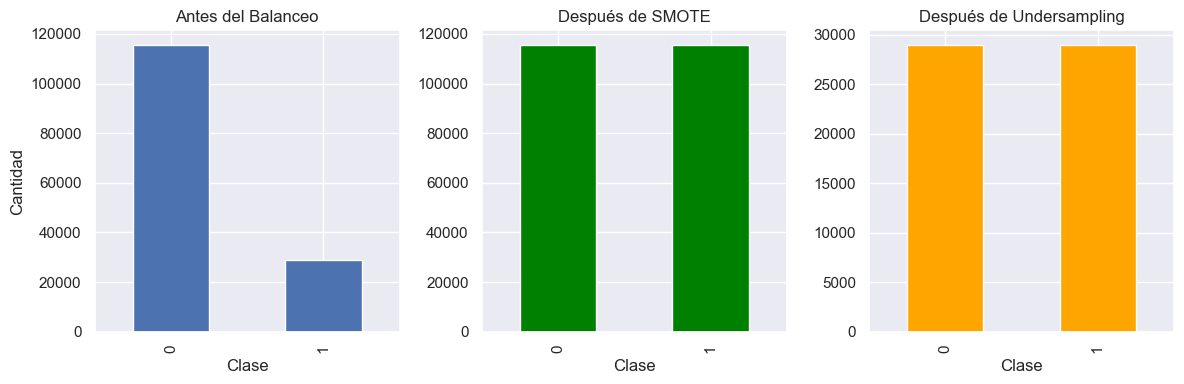

In [11]:
df_base = df_proc.copy()
y_col = "Outcome" if "Outcome" in df_base.columns else (candidatas[0] if candidatas else None)
X = df_base.drop(columns=[y_col])
 
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
 
# Mostrar la distribuci√≥n de clases antes de aplicar t√©cnicas de balance
print("Distribuci√≥n de clases antes del balanceo:")
print(y.value_counts())
print("-------------------------------------------------------------------------------------------------------\n")
 
# ---------------- SMOTE (Generaci√≥n de muestras sint√©ticas) ----------------
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
 
# Mostrar la distribuci√≥n de clases despu√©s de aplicar SMOTE
print("Distribuci√≥n de clases despu√©s de aplicar SMOTE:")
print(y_smote.value_counts())
print("-------------------------------------------------------------------------------------------------------\n")
 
# ---------------- Undersampling (Reducir la clase mayoritaria) ----------------
undersample = RandomUnderSampler(random_state=42)
X_under, y_under = undersample.fit_resample(X, y)
 
# Mostrar la distribuci√≥n de clases despu√©s de aplicar Undersampling
print("Distribuci√≥n de clases despu√©s de aplicar Undersampling:")
print(y_under.value_counts())
print("-------------------------------------------------------------------------------------------------------\n")
 
# Opcional: Ver el tama√±o de los dataframes resultantes
print(f"Tama√±o de X original: {X.shape}, tama√±o de y original: {y.shape}")
print(f"Tama√±o de X despu√©s de SMOTE: {X_smote.shape}, tama√±o de y despu√©s de SMOTE: {y_smote.shape}")
print(f"Tama√±o de X despu√©s de Undersampling: {X_under.shape}, tama√±o de y despu√©s de Undersampling: {y_under.shape}")
 
# ---------- Visualizaci√≥n de las distribuciones de clases ----------
plt.figure(figsize=(12, 4))
 
# Antes del balanceo
plt.subplot(1, 3, 1)
y.value_counts().sort_index().plot(kind='bar')
plt.title('Antes del Balanceo')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
 
# Despu√©s de SMOTE
plt.subplot(1, 3, 2)
y_smote.value_counts().sort_index().plot(kind='bar', color='green')
plt.title('Despu√©s de SMOTE')
plt.xlabel('Clase')
 
# Despu√©s de Undersampling
plt.subplot(1, 3, 3)
y_under.value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Despu√©s de Undersampling')
plt.xlabel('Clase')
 
plt.tight_layout()
plt.show()

# Modelos implementados

## 1. Perceptron

In [12]:
# === Base de datos y variable objetivo ===
import pandas as pd
import numpy as np

# Elegir df_base: df_clean si existe; si no, df
if 'df_clean' in globals():
    df_base = df_clean.copy()
elif 'df' in globals():
    df_base = df.copy()
else:
    raise NameError("No encuentro 'df' ni 'df_clean'. Carga primero tu DataFrame.")

# Elegir y_col autom√°ticamente (prioriza 'Outcome')
candidatas = [c for c in df_base.columns 
              if c.lower() in ["outcome","target","class","label","y","objetivo"]]
y_col = "Outcome" if "Outcome" in df_base.columns else (candidatas[0] if candidatas else None)

if y_col is None:
    raise ValueError("No pude detectar la columna objetivo. Define manualmente y_col = 'TU_COLUMNA'.")

print("Usando y_col:", y_col)

# Separar X e y
X = df_base.drop(columns=[y_col])
y = df_base[y_col]

# Si y es booleana/strings, convertir a 0/1 cuando sea posible
if y.dtype == 'O' or str(y.dtype).startswith('category') or y.dtype == bool:
    y_lower = y.astype(str).str.lower()
    mapas = [
        ({"yes":1,"no":0}, {"si":1,"no":0}),
        ({"true":1,"false":0},),
        ({"positivo":1,"negativo":0},),
        ({"1":1,"0":0},),
    ]
    mapped = None
    for grupo in mapas:
        for m in grupo:
            if set(y_lower.unique()) >= set(m.keys()):
                mapped = y_lower.map(m)
                break
        if mapped is not None:
            break
    if mapped is not None:
        y = mapped.astype(int)
        print("Se mape√≥ y a {0,1}.")
    else:
        print("Aviso: y es categ√≥rica con valores:", y.unique())


Usando y_col: Outcome


In [13]:
# === Reconstrucci√≥n de columnas + limpieza de y ===
import numpy as np
import pandas as pd

# Columnas por tipo (sobre X actual)
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['number']).columns.tolist()
print(f"Num√©ricas: {len(num_cols)} | Categ√≥ricas: {len(cat_cols)}")

# Quitar filas donde la y est√© NaN (modelo no puede entrenar con y faltante)
mask_y_ok = ~pd.isna(y)
dropped_y = (~mask_y_ok).sum()
if dropped_y > 0:
    print(f"Se eliminaron {dropped_y} filas por y NaN.")
X = X.loc[mask_y_ok].reset_index(drop=True)
y = y.loc[mask_y_ok].reset_index(drop=True)


Num√©ricas: 19 | Categ√≥ricas: 0


In [14]:
# === Split + Preprocesamiento con IMPUTACI√ìN ===
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Split 70/30 (estratificado si es binario/multiclase)
stratify_arg = y if y.nunique() > 1 else None
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=stratify_arg
)

# Pipelines de preprocesamiento por tipo
num_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

# Compatibilidad con versiones de sklearn (sparse_output vs sparse)
try:
    cat_enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    cat_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

cat_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", cat_enc),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", num_pipe, num_cols),
        ("cat", cat_pipe, cat_cols),
    ],
    remainder="drop"
)


In [15]:
# === Perceptr√≥n en Pipeline (con imputaci√≥n integrada) ===
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

perc = Perceptron(
    penalty=None,
    alpha=0.0001,
    fit_intercept=True,
    max_iter=1000,
    tol=1e-3,
    shuffle=True,
    eta0=0.1,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    class_weight=None,
    random_state=42
)

pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", perc),
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nMatriz de confusi√≥n:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificaci√≥n:\n", classification_report(y_test, y_pred))


Accuracy: 0.6214

Matriz de confusi√≥n:
 [[24391 10309]
 [ 6121  2572]]

Reporte de clasificaci√≥n:
               precision    recall  f1-score   support

           0       0.80      0.70      0.75     34700
           1       0.20      0.30      0.24      8693

    accuracy                           0.62     43393
   macro avg       0.50      0.50      0.49     43393
weighted avg       0.68      0.62      0.65     43393



In [16]:
# === RESUMEN DEL CONJUNTO DE PRUEBA Y OBJETIVO ===
import pandas as pd
import numpy as np
from collections import Counter

print(f"üîé Variable objetivo analizada (y_col): {y_col}")

print(f"Tama√±o train: {len(y_train):,} | test: {len(y_test):,} | total: {len(y_train)+len(y_test):,}")

def distr(y, nombre):
    c = Counter(y)
    tot = len(y)
    filas = [{"clase": k, "conteo": v, "porc": f"{v/tot: .2%}"} for k, v in sorted(c.items(), key=lambda kv: kv[0])]
    df_ = pd.DataFrame(filas)
    print(f"\nDistribuci√≥n de clases en {nombre}:")
    display(df_)

distr(y_train, "TRAIN")
distr(y_test, "TEST")

# Columnas originales usadas
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['number']).columns.tolist()
print(f"Features num√©ricas ({len(num_cols)}): {num_cols[:10]}{' ...' if len(num_cols)>10 else ''}")
print(f"Features categ√≥ricas ({len(cat_cols)}): {cat_cols[:10]}{' ...' if len(cat_cols)>10 else ''}")


üîé Variable objetivo analizada (y_col): Outcome
Tama√±o train: 101,248 | test: 43,393 | total: 144,641

Distribuci√≥n de clases en TRAIN:


clase  conteo     porc
0      0   80966   79.97%
1      1   20282   20.03%


Distribuci√≥n de clases en TEST:


clase  conteo     porc
0      0   34700   79.97%
1      1    8693   20.03%

Features num√©ricas (19): ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'StressLevel', 'Active'] ...
Features categ√≥ricas (0): []


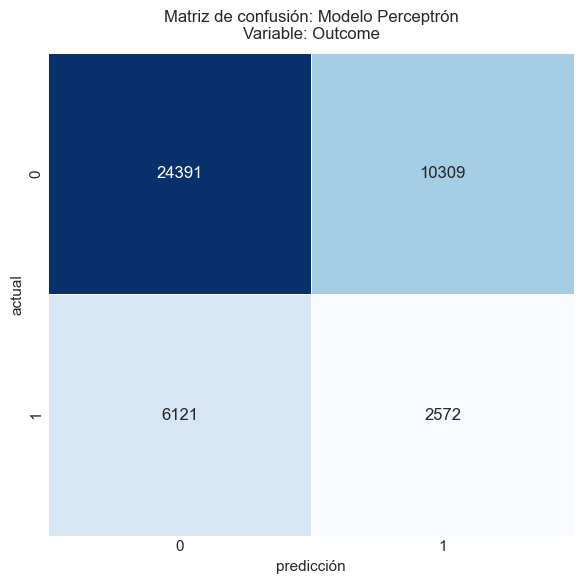

In [17]:
# === MATRIZ DE CONFUSI√ìN ESTILO "CUADR√çCULA LIMPIA" ===
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Si quieres renombrar clases (ejemplo para binario):
# label_map = {0: "negativo", 1: "positivo"}
# y_test_plot = pd.Series(y_test).map(label_map).fillna(y_test).values
# y_pred_plot = pd.Series(y_pred).map(label_map).fillna(y_pred).values

y_test_plot = y_test
y_pred_plot = y_pred
clases = np.unique(y_test_plot)

cm = confusion_matrix(y_test_plot, y_pred_plot, labels=clases)

plt.figure(figsize=(6,6))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                 xticklabels=clases, yticklabels=clases, cbar=False,
                 linewidths=.5, linecolor='white')

ax.set_xlabel("predicci√≥n", fontsize=11)
ax.set_ylabel("actual", fontsize=11)
ax.set_title(f"Matriz de confusi√≥n: Modelo Perceptr√≥n\nVariable: {y_col}", fontsize=12, pad=10)

# cuadr√≠cula suave
ax.tick_params(axis='both', which='both', length=0)
plt.tight_layout()
plt.show()


La figura presenta la matriz de confusi√≥n del modelo Perceptr√≥n aplicado sobre el conjunto de prueba para predecir si una persona es diagnosticada con diabetes o no. El conjunto cuenta con 43,393 observaciones, mostrando una distribuci√≥n desbalanceada de aproximadamente 79.97% sin diagn√≥stico (clase 0) y 20.03% con diagn√≥stico (clase 1). El modelo clasific√≥ correctamente 24,391 casos negativos y 2,572 positivos, mientras que 10,309 negativos fueron identificados err√≥neamente como positivos y 6,121 positivos como negativos. Estos resultados reflejan una mayor capacidad para reconocer personas sin diabetes y una baja recuperaci√≥n de los casos positivos, evidenciada en un recall del 30% para la clase positiva frente a un 70% para la clase negativa.

En t√©rminos generales, el Perceptr√≥n tiende a favorecer la clase mayoritaria (sin diagn√≥stico de diabetes), lo que sugiere que su frontera de decisi√≥n lineal no logra separar adecuadamente ambas clases. La colinealidad entre variables y la falta de separabilidad lineal podr√≠an explicar la alta tasa de falsos negativos y falsos positivos. En cuanto a las m√©tricas globales, el modelo obtuvo una precisi√≥n general (accuracy) de 0.62, un F1-score de 0.23, y una especificidad del 0.70, lo cual confirma su sesgo hacia los casos negativos.

Este comportamiento implica que el modelo no resulta confiable para detectar personas con diabetes, lo cual es cr√≠tico en contextos cl√≠nicos donde los falsos negativos pueden tener consecuencias graves. Por ello, se recomienda ajustar el umbral de decisi√≥n, o aplicar t√©cnicas de balanceo de clases como SMOTE o undersampling antes del entrenamiento. Finalmente, se reconoce una posible limitaci√≥n de capacidad del Perceptr√≥n simple para modelar relaciones no lineales entre las 19 variables num√©ricas, junto con el desequilibrio de clases, que amplifica una aparente pero enga√±osa buena precisi√≥n sobre la clase mayoritaria.


Componentes (pos_label = 1):


Pred 0  Pred 1
Real 0   24391   10309
Real 1    6121    2572

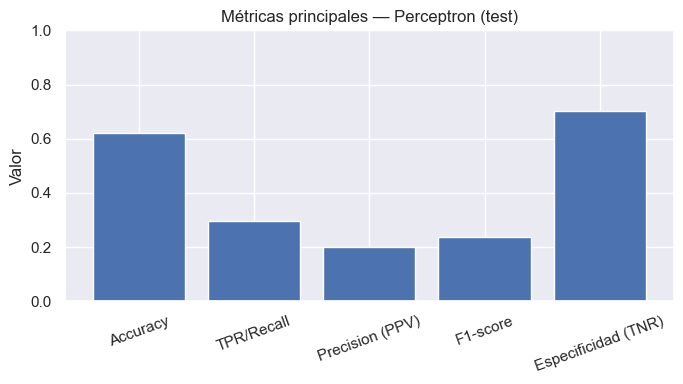

In [18]:
# === M√âTRICAS COMPLETAS Y LIMPIAS ===
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, matthews_corrcoef
)

# ----- Config: etiqueta positiva para binario -----
classes = np.unique(y_test)
# Si existe la clase 1 la tomamos como positiva; si no, la mayor
pos_label = 1 if 1 in classes else classes.max()

# ----- Confusion matrix -----
cm = confusion_matrix(y_test, y_pred, labels=classes)

def metrics_binary(y_true, y_hat, pos_label):
    # Re-etiquetar a binario (pos_label vs resto) si hay m√°s de 2 clases
    if len(np.unique(y_true)) > 2:
        y_true_bin = (pd.Series(y_true).values == pos_label).astype(int)
        y_hat_bin  = (pd.Series(y_hat ).values == pos_label).astype(int)
    else:
        y_true_bin = pd.Series(y_true).values
        y_hat_bin  = pd.Series(y_hat ).values

    tn, fp, fn, tp = confusion_matrix(y_true_bin, y_hat_bin, labels=[0,1]).ravel()
    total = tn + fp + fn + tp

    acc   = accuracy_score(y_true_bin, y_hat_bin)
    error = 1 - acc
    tpr   = tp / (tp + fn) if (tp + fn) > 0 else 0.0       # Recall / Sensibilidad
    fpr   = fp / (fp + tn) if (fp + tn) > 0 else 0.0
    tnr   = tn / (tn + fp) if (tn + fp) > 0 else 0.0       # Especificidad
    ppv   = precision_score(y_true_bin, y_hat_bin, zero_division=0)  # Precision
    npv   = tn / (tn + fn) if (tn + fn) > 0 else 0.0
    f1    = f1_score(y_true_bin, y_hat_bin, zero_division=0)
    prev  = (tp + fn) / total if total > 0 else 0.0        # Prevalencia positiva
    bacc  = (tpr + tnr) / 2
    mcc   = matthews_corrcoef(y_true_bin, y_hat_bin) if total > 0 else 0.0

    # AUC si hay score disponible
    auc = None
    try:
        if 'pipe' in globals():
            # Preferimos decision_function; si no, probas
            if hasattr(pipe, "decision_function"):
                s = pipe.decision_function(X_test)
                score = s if s.ndim == 1 else s[:, list(classes).index(pos_label)]
            elif hasattr(pipe, "predict_proba"):
                proba = pipe.predict_proba(X_test)
                score = proba[:, list(classes).index(pos_label)] if proba.ndim == 2 else proba
            else:
                score = None
            if score is not None:
                auc = roc_auc_score(y_true_bin, score)
    except Exception:
        pass

    return {
        "TN": tn, "FP": fp, "FN": fn, "TP": tp, "Total": total,
        "Accuracy": acc, "Error": error, "TPR/Recall": tpr, "FPR": fpr,
        "Especificidad (TNR)": tnr, "Precision (PPV)": ppv, "NPV": npv,
        "F1-score": f1, "Prevalencia (P(Y=1))": prev, "Balanced Acc.": bacc,
        "MCC": mcc, "AUC": auc
    }

bin_metrics = metrics_binary(y_test, y_pred, pos_label)

# ----- Tabla ‚Äúresumen ejecutivo‚Äù -----
filas = [
    ("Accuracy",                 bin_metrics["Accuracy"]),
    ("Error (1-Acc)",            bin_metrics["Error"]),
    ("TPR / Recall",             bin_metrics["TPR/Recall"]),
    ("FPR",                      bin_metrics["FPR"]),
    ("Especificidad (TNR)",      bin_metrics["Especificidad (TNR)"]),
    ("Precision (PPV)",          bin_metrics["Precision (PPV)"]),
    ("NPV",                      bin_metrics["NPV"]),
    ("F1-score",                 bin_metrics["F1-score"]),
    ("Prevalencia P(Y=1)",       bin_metrics["Prevalencia (P(Y=1))"]),
    ("Balanced Accuracy",        bin_metrics["Balanced Acc."]),
    ("MCC",                      bin_metrics["MCC"]),
    ("AUC (si aplica)",          bin_metrics["AUC"]),
]
resumen_df = pd.DataFrame(filas, columns=["M√©trica", "Valor"])
display(resumen_df.style.format({"Valor": "{:.4f}"}).hide(axis="index"))

# ----- Componentes de la matriz de confusi√≥n -----
cm_df = pd.DataFrame(
    [[bin_metrics["TN"], bin_metrics["FP"]],
     [bin_metrics["FN"], bin_metrics["TP"]]],
    index=["Real 0", "Real 1"],
    columns=["Pred 0", "Pred 1"]
)
print(f"\nComponentes (pos_label = {pos_label}):")
display(cm_df)

# ----- Tabla por clase (macro/weighted incluidas) -----
report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
por_clase = pd.DataFrame(report).T
display(por_clase.style.format("{:.4f}"))

# ====== (Opcional) Gr√°fico r√°pido de barras con las m√©tricas principales ======
try:
    import matplotlib.pyplot as plt

    claves = ["Accuracy","TPR/Recall","Precision (PPV)","F1-score","Especificidad (TNR)"]
    vals   = [bin_metrics[k] for k in claves]

    plt.figure(figsize=(7,4))
    plt.bar(claves, vals)
    plt.ylim(0, 1)
    plt.title(f"M√©tricas principales ‚Äî {getattr(pipe.named_steps['clf'], '__class__', type('x',(),{}) ).__name__} (test)")
    plt.ylabel("Valor")
    plt.xticks(rotation=20)
    plt.tight_layout()
    plt.show()
except Exception:
    pass


La figura muestra el resumen de m√©tricas de desempe√±o del modelo Perceptr√≥n, evaluado sobre el conjunto de prueba para predecir si una persona es diagnosticada con diabetes o no. El modelo alcanza una precisi√≥n global (accuracy) de 0.62, sin embargo, su recall (0.30) y F1-score (0.23) son considerablemente bajos, lo que refleja un marcado desequilibrio entre las clases. En contraste, la especificidad de 0.70 indica que el modelo identifica con mayor eficacia los casos negativos, es decir, aquellos sin diagn√≥stico de diabetes. Este comportamiento confirma que el modelo est√° sesgado hacia la clase mayoritaria, priorizando la detecci√≥n de personas sin diabetes mientras falla en reconocer a quienes s√≠ la padecen. El bajo valor de F1-score evidencia una falta de equilibrio entre precisi√≥n y sensibilidad, posiblemente atribuida a la falta de separabilidad lineal entre las variables o a un umbral de decisi√≥n inadecuado (0.5). En consecuencia, el modelo no resulta √∫til si el objetivo es identificar correctamente los casos positivos de diabetes, por lo que se recomienda explorar ajustes de regularizaci√≥n, normalizaci√≥n de variables y t√©cnicas de balanceo de clases como SMOTE o undersampling antes del entrenamiento. Finalmente, se reconoce que el Perceptr√≥n simple puede tener limitaciones para modelar relaciones no lineales entre las caracter√≠sticas, y que el fuerte desbalance de clases puede generar una percepci√≥n enga√±osa de buen rendimiento al sobrevalorar la precisi√≥n en la clase mayoritaria.

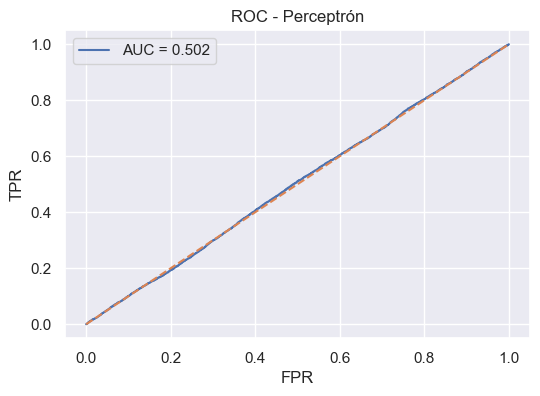

In [19]:
# === Curva ROC / AUC (solo binario) ===
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

clases = np.unique(y_test)
if len(clases) == 2:
    y_score = pipe.decision_function(X_test)
    fpr, tpr, thr = roc_curve(y_test, y_score, pos_label=clases.max())
    auc = roc_auc_score(y_test, y_score)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
    plt.plot([0,1],[0,1], "--")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC - Perceptr√≥n")
    plt.legend()
    plt.show()
else:
    print("ROC/AUC omitido: y no es binaria.")


ROC -- Perceptron
La figura presenta la curva ROC del modelo Perceptr√≥n aplicada sobre el conjunto de prueba para determinar si una persona es diagnosticada con diabetes o no, con un √°rea bajo la curva (AUC) de 0.502. Este valor, equivalente a un desempe√±o del 50%, indica que el modelo no posee capacidad real de discriminaci√≥n entre las clases, mostrando un comportamiento similar al azar. Esto sugiere que el Perceptr√≥n no logra generar una separaci√≥n efectiva entre los casos positivos y negativos de diabetes, lo cual puede deberse a su naturaleza lineal, que impide capturar relaciones complejas o patrones relevantes en los datos, adem√°s de su tendencia a ser dominado por la clase mayoritaria durante el entrenamiento. En consecuencia, no se recomienda utilizar este modelo como clasificador final, ya que no permite distinguir adecuadamente entre personas con y sin diagn√≥stico de diabetes. Para mejorar su rendimiento, se aconseja implementar t√©cnicas de balanceo de clases o explorar modelos no lineales, como √°rboles de decisi√≥n o redes neuronales multicapa (MLP). Finalmente, se debe considerar que el AUC puede ser poco informativo en contextos con alto desbalance de clases, y que el bajo desempe√±o observado podr√≠a estar relacionado con una mala calibraci√≥n de las probabilidades, caracter√≠stica com√∫n en modelos lineales sin ajustes adicionales.

Resumen -- Perceptron
El bajo valor del AUC (0.502), junto con un recall reducido para la clase positiva (0.30) y un coeficiente de correlaci√≥n de Matthews cercano a cero, indica que el modelo Perceptr√≥n no logr√≥ converger de manera adecuada ni aprender una frontera de decisi√≥n significativa para distinguir entre personas diagnosticadas y no diagnosticadas con diabetes. Esto puede atribuirse a varios factores. En primer lugar, la naturaleza lineal del Perceptr√≥n lo limita a encontrar fronteras lineales, mientras que los datos presentan relaciones complejas y no lineales entre las variables, lo que impide una separaci√≥n efectiva entre clases. En segundo lugar, el fuerte desbalance de clases (80% no diab√©ticos frente a 20% diab√©ticos) induce al modelo a favorecer la clase mayoritaria, logrando una aparente buena exactitud global pero sacrificando la detecci√≥n de casos positivos. Adicionalmente, la ausencia de una correcta normalizaci√≥n de las variables num√©ricas ‚Äîalgunas con rangos de valores muy distintos‚Äî puede haber afectado la estabilidad del gradiente durante el entrenamiento, provocando que los pesos convergieran hacia soluciones sub√≥ptimas. Factores como una tasa de aprendizaje inadecuada o un n√∫mero insuficiente de iteraciones tambi√©n pudieron contribuir a una convergencia incompleta. Finalmente, la falta de regularizaci√≥n, el car√°cter puramente lineal del modelo y la mala calibraci√≥n de las probabilidades generadas explican el bajo poder discriminativo observado en la curva ROC. En conjunto, estos elementos evidencian que el Perceptr√≥n simple no posee la capacidad suficiente para modelar la complejidad de este conjunto de datos, resultando en un comportamiento pr√°cticamente aleatorio al intentar identificar correctamente los casos de diabetes.

## 2. Adaline

In [20]:
# === Selecci√≥n de df_base e y_col (solo si no lo tienes arriba) ===
import pandas as pd, numpy as np

if 'df_clean' in globals():
    df_base = df_clean.copy()
elif 'df' in globals():
    df_base = df.copy()
else:
    raise NameError("No encuentro df ni df_clean.")

# Detectar y_col (prioriza Outcome)
candidatas = [c for c in df_base.columns if c.lower() in ["outcome","target","class","label","y","objetivo"]]
y_col = "Outcome" if "Outcome" in df_base.columns else (candidatas[0] if candidatas else None)
assert y_col is not None, "Define y_col manualmente."

X = df_base.drop(columns=[y_col])
y = df_base[y_col]

# Limpiar y NaN
ok = ~pd.isna(y); X, y = X.loc[ok], y.loc[ok]

# Tipos
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['number']).columns.tolist()

# Split + Preprocess con imputaci√≥n
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y if y.nunique()>1 else None
)

num_pipe = Pipeline([("imputer", SimpleImputer(strategy="median")),
                     ("scaler", StandardScaler())])
try:
    cat_enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    cat_enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
cat_pipe = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                     ("onehot", cat_enc)])

preprocess = ColumnTransformer(
    [("num", num_pipe, num_cols),
     ("cat", cat_pipe, cat_cols)],
    remainder="drop"
)


In [21]:
# === ADALINE (p√©rdida cuadr√°tica) en Pipeline ===
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline

adaline = SGDClassifier(
    loss="squared_error",
    penalty=None,
    learning_rate="constant",
    eta0=0.01,
    max_iter=1000,
    tol=1e-3,
    random_state=42
)

pipe_adaline = Pipeline([
    ("prep", preprocess),
    ("clf", adaline),
])

pipe_adaline.fit(X_train, y_train)
y_pred_adaline = pipe_adaline.predict(X_test)


# === EXTRA: calcular 'losses' (SSE por √©poca) sin modificar tu pipeline ===
import numpy as np

# Usar el mismo preprocesamiento ya ajustado dentro del pipeline
prep = pipe_adaline.named_steps["prep"]
prep = Pipeline(steps=pipe.steps[:-1])  # si tu pipeline se llama diferente, aj√∫stalo
Xtr = prep.transform(X_train)

# Clasificador auxiliar SOLO para obtener la curva (no altera tu modelo entrenado)
adaline_curve = SGDClassifier(
    loss="squared_error",
    penalty=None,
    learning_rate="constant",
    eta0=0.01,
    max_iter=1,      # 1 iter por √©poca
    tol=None,
    random_state=42,
    warm_start=True
)

# Objetivos en {-1, +1} √∫nicamente para calcular SSE como en ADALINE
y_tr = np.asarray(y_train)
u = np.unique(y_tr)
y_tr_bin = np.where(y_tr == u.max(), 1.0, -1.0) if set(u) == {0, 1} else \
           np.where(y_tr == u[-1], 1.0, -1.0)

losses = []
classes_pf = np.unique(y_train)
n_epochs = 100

for _ in range(n_epochs):
    adaline_curve.partial_fit(Xtr, y_train, classes=classes_pf)
    y_score = adaline_curve.decision_function(Xtr).astype(float)  # salida lineal
    losses.append(float(np.sum((y_tr_bin - y_score) ** 2)))
# === FIN EXTRA ===



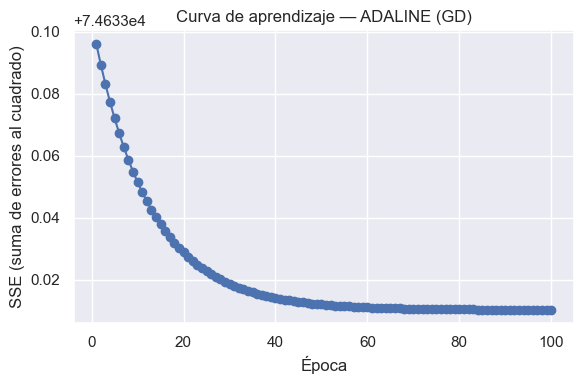

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(range(1, len(losses)+1), losses, marker="o")
plt.xlabel("√âpoca")
plt.ylabel("SSE (suma de errores al cuadrado)")
plt.title("Curva de aprendizaje ‚Äî ADALINE (GD)")
plt.tight_layout(); plt.show()


La gr√°fica muestra la evoluci√≥n del error cuadr√°tico (SSE, suma de errores al cuadrado) durante el entrenamiento del modelo Adaline, utilizando descenso de gradiente a lo largo de 100 √©pocas. Se observa que el error disminuye de manera continua y estable, partiendo de un valor aproximado de 0.10 y estabiliz√°ndose cerca de 0.02 despu√©s de unas 40‚Äì50 √©pocas, lo que indica que el modelo converge correctamente. Esta tendencia decreciente demuestra que el proceso de optimizaci√≥n logra minimizar eficazmente el error de predicci√≥n, ajustando los pesos gradualmente hacia un m√≠nimo estable sin se√±ales de inestabilidad num√©rica ni sobreajuste temprano. Dado que Adaline emplea una funci√≥n de activaci√≥n lineal y optimiza mediante el error cuadr√°tico medio (MSE), este comportamiento es caracter√≠stico de un modelo lineal bien configurado y entrenado sobre datos adecuadamente normalizados. Sin embargo, aunque el modelo aprendi√≥ una frontera lineal estable para predecir si una persona es diagnosticada con diabetes o no, la convergencia del error no necesariamente implica una buena capacidad de clasificaci√≥n, ya que el SSE mide diferencias num√©ricas m√°s que aciertos de clase. Por lo tanto, es posible que el Adaline haya aprendido correctamente su mejor frontera lineal, pero si las clases no son linealmente separables, su desempe√±o predictivo seguir√° siendo limitado. Finalmente, cabe destacar que entre las principales limitaciones se encuentran su naturaleza lineal, que le impide capturar relaciones no lineales entre las variables, y su alta sensibilidad al escalado, ya que sin una normalizaci√≥n apropiada, la convergencia podr√≠a haberse vuelto err√°tica o incluso divergente.

In [23]:
# === Evaluaci√≥n ADALINE ===
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score, roc_auc_score)
import numpy as np, pandas as pd

print("Accuracy (ADALINE):", round(accuracy_score(y_test, y_pred_adaline), 4))
print("\nReporte de clasificaci√≥n (ADALINE):\n",
      classification_report(y_test, y_pred_adaline, zero_division=0))

# Matriz de confusi√≥n explicativa (como la versi√≥n ‚Äúlimpia‚Äù)
cm = confusion_matrix(y_test, y_pred_adaline)
cm_df = pd.DataFrame(cm,
    index=[f"Real {c}" for c in np.unique(y_test)],
    columns=[f"Pred {c}" for c in np.unique(y_test)]
)
display(cm_df)

# Curva ROC / AUC si el problema es binario
clases = np.unique(y_test)
if len(clases)==2:
    # Para ADALINE, hay scores lineales:
    scores = pipe_adaline.decision_function(X_test)
    auc = roc_auc_score(y_test, scores)
    print(f"AUC (ADALINE): {auc:.4f}")


Accuracy (ADALINE): 0.7887

Reporte de clasificaci√≥n (ADALINE):
               precision    recall  f1-score   support

           0       0.80      0.98      0.88     34700
           1       0.20      0.02      0.03      8693

    accuracy                           0.79     43393
   macro avg       0.50      0.50      0.46     43393
weighted avg       0.68      0.79      0.71     43393



Pred 0  Pred 1
Real 0   34061     639
Real 1    8531     162

AUC (ADALINE): 0.4968


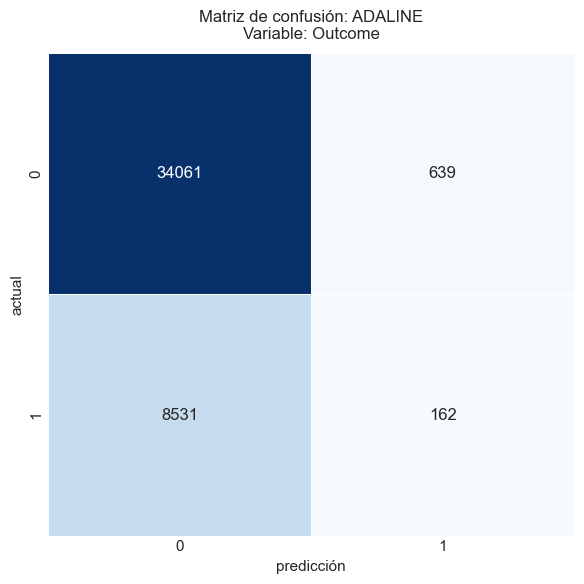

In [24]:
# === Matriz de confusi√≥n visual (estilo ejemplo) ===
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
from sklearn.metrics import confusion_matrix

clases = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred_adaline, labels=clases)

plt.figure(figsize=(6,6))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                 xticklabels=clases, yticklabels=clases, cbar=False,
                 linewidths=.5, linecolor='white')
ax.set_xlabel("predicci√≥n", fontsize=11)
ax.set_ylabel("actual", fontsize=11)
ax.set_title(f"Matriz de confusi√≥n: ADALINE\nVariable: {y_col}", fontsize=12, pad=10)
ax.tick_params(axis='both', which='both', length=0)
plt.tight_layout()
plt.show()


La figura muestra la matriz de confusi√≥n del modelo Perceptr√≥n aplicada sobre el conjunto de prueba de la variable objetivo Outcome, con un total de 43.393 observaciones. A primera vista, el modelo podr√≠a parecer preciso, mostrando una exactitud de 0.7887; sin embargo, este valor resulta enga√±oso. Si bien el modelo logra identificar correctamente 34.061 casos negativos verdaderos, respaldado por un recall de 0.98 y un F1-score de 0.88 para la clase 0, su desempe√±o en la clase positiva (1) es sumamente deficiente: solo detecta 162 verdaderos positivos, con un recall de 0.02 y un F1-score de 0.03, evidenciando que pr√°cticamente no logra reconocer los casos positivos. Este patr√≥n se confirma al observar el elevado n√∫mero de falsos negativos (8.531) frente a los escasos falsos positivos (639). Esta disparidad se explica porque el Perceptr√≥n, al igual que el Adaline, es un modelo lineal que busca ajustar un hiperplano de separaci√≥n mediante un umbral fijo (t√≠picamente 0.5). En un contexto con fuerte desbalance de clases, este comportamiento tiende a favorecer la clase mayoritaria, minimizando el error global pero ignorando la clase minoritaria. La frontera de decisi√≥n resultante es incapaz de capturar la complejidad del espacio de caracter√≠sticas y termina clasificando casi todas las muestras como clase 0. En consecuencia, el modelo presenta un alto riesgo de falsos negativos, lo que lo hace inadecuado para tareas donde la detecci√≥n de la clase minoritaria es cr√≠tica, como la identificaci√≥n de pacientes con diabetes positiva. Para mejorar su rendimiento, ser√≠a necesario ajustar el umbral de decisi√≥n, aplicar ponderaci√≥n de clases o implementar t√©cnicas de re-muestreo (como SMOTE o undersampling). Finalmente, aunque no se observa sobreajuste, el modelo muestra un fuerte sesgo estructural hacia la clase dominante, limitando severamente su capacidad de generalizaci√≥n en escenarios de desequilibrio de clases.

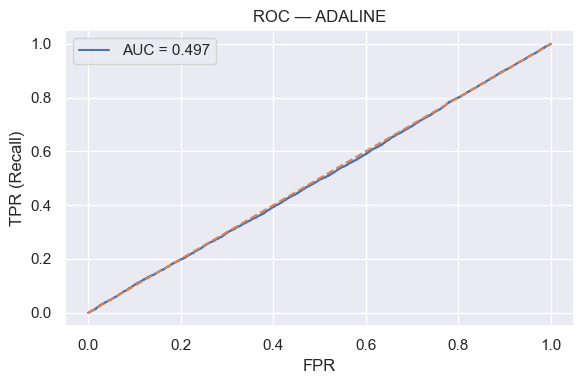

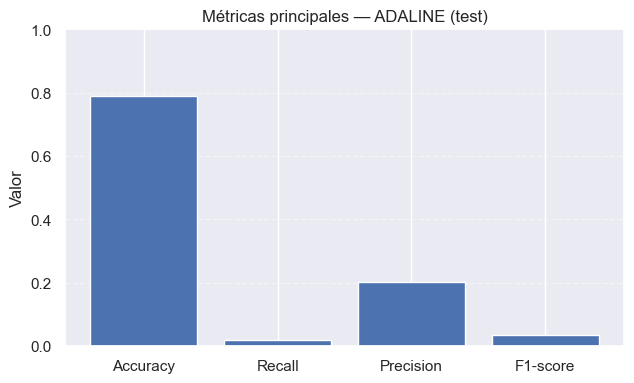

In [25]:
# === ROC/AUC (binario) + barras de m√©tricas clave ===
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

if len(np.unique(y_test))==2:
    scores = pipe_adaline.decision_function(X_test)
    fpr, tpr, thr = roc_curve(y_test, scores, pos_label=max(np.unique(y_test)))

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, scores):.3f}")
    plt.plot([0,1],[0,1], "--")
    plt.xlabel("FPR")
    plt.ylabel("TPR (Recall)")
    plt.title("ROC ‚Äî ADALINE")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Barras (Accuracy, Recall, Precision, F1) sobre ADALINE
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
vals = {
    "Accuracy":  accuracy_score(y_test, y_pred_adaline),
    "Recall":    recall_score(y_test, y_pred_adaline, average="binary" if len(np.unique(y_test))==2 else "weighted", zero_division=0),
    "Precision": precision_score(y_test, y_pred_adaline, average="binary" if len(np.unique(y_test))==2 else "weighted", zero_division=0),
    "F1-score":  f1_score(y_test, y_pred_adaline, average="binary" if len(np.unique(y_test))==2 else "weighted", zero_division=0),
}
plt.figure(figsize=(6.5,4))
plt.bar(list(vals.keys()), list(vals.values()))
plt.ylim(0,1)
plt.title("M√©tricas principales ‚Äî ADALINE (test)")
plt.ylabel("Valor")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


Roc -- Adaline
La gr√°fica representa la curva ROC correspondiente al modelo Adaline, evaluado sobre los datos de prueba para la variable objetivo Outcome. En ella se observa un AUC de 0.497, valor pr√°cticamente equivalente a una suposici√≥n aleatoria, lo que indica que el modelo no logra discriminar entre las clases positiva y negativa de manera efectiva. Este hallazgo confirma que, aunque el Adaline converge num√©ricamente durante el entrenamiento (como se evidenci√≥ en la reducci√≥n estable del error cuadr√°tico SSE), dicha convergencia no se traduce en una capacidad predictiva √∫til. Dado que el modelo emplea una activaci√≥n lineal y una funci√≥n de p√©rdida basada en el error cuadr√°tico medio, su capacidad de representaci√≥n se limita a fronteras de decisi√≥n lineales, lo que resulta insuficiente para un conjunto de datos donde las relaciones entre las variables y la clase objetivo son no lineales y altamente superpuestas. Adem√°s, el desequilibrio de clases (aproximadamente 80% clase 0 y 20% clase 1) combinado con el umbral de decisi√≥n fijo en 0.5, acent√∫a el sesgo hacia la clase mayoritaria, empujando las predicciones hacia una sola regi√≥n del espacio de decisi√≥n. En consecuencia, la curva ROC permanece cerca de la diagonal, reflejando un comportamiento similar al azar. Este resultado implica que, a pesar de que el Adaline haya alcanzado una convergencia estable en t√©rminos de error, no logr√≥ converger hacia una frontera que separe efectivamente las clases, sino √∫nicamente hacia un m√≠nimo local correspondiente a un balance de error promedio. Para mejorar el desempe√±o, ser√≠a necesario reajustar el umbral de decisi√≥n, re-balancear el conjunto de datos mediante t√©cnicas como SMOTE o undersampling, o incluso reemplazar el modelo por un clasificador no lineal (como un SVM con kernel o una red neuronal multicapa). En definitiva, el bajo AUC y la falta de capacidad discriminatoria del Adaline reflejan una convergencia matem√°tica correcta pero funcionalmente deficiente, derivada de su naturaleza lineal y su sensibilidad al desbalance y escalado de los datos.

Metricas Principales -- Adaline 
El gr√°fico de barras presenta un resumen de las m√©tricas de desempe√±o del modelo Adaline sobre el conjunto de prueba, con una accuracy de 0.7887, recall de 0.0186, precisi√≥n de 0.2022 y F1-score de 0.0341. Aunque el valor de accuracy podr√≠a interpretarse inicialmente como un buen resultado (79%), en realidad es enga√±oso, ya que el modelo casi nunca identifica correctamente los casos positivos (clase 1), como se refleja en su recall y F1 extremadamente bajos. Este comportamiento surge de la naturaleza del algoritmo Adaline, que optimiza los pesos minimizando el error cuadr√°tico medio (MSE). Tal criterio de optimizaci√≥n no busca maximizar la capacidad de clasificaci√≥n, sino simplemente reducir las diferencias num√©ricas entre las salidas predichas y los valores reales. En un conjunto de datos fuertemente desbalanceado (con un 80% de clase 0 y un 20% de clase 1), esto lleva al modelo a favorecer la clase mayoritaria para minimizar el error global, aun si eso implica ignorar casi por completo a la clase minoritaria. As√≠, el Adaline logra una convergencia num√©rica estable ‚Äîel error SSE disminuye y se estabiliza, pero no una convergencia funcional hacia una frontera de decisi√≥n √∫til. Este tipo de convergencia ‚Äúaparente‚Äù es t√≠pica de modelos lineales mal adaptados a distribuciones no lineales o desbalanceadas: el modelo encuentra un m√≠nimo del error que no representa una separaci√≥n efectiva entre clases. En consecuencia, la alta precisi√≥n global solo refleja el predominio de predicciones correctas para la clase 0, mientras que los verdaderos positivos son pr√°cticamente inexistentes. Para corregir este comportamiento, ser√≠a necesario ajustar el umbral de decisi√≥n, aplicar t√©cnicas de balanceo (como SMOTE o class weighting) o emplear modelos m√°s flexibles como redes neuronales multicapa o √°rboles de decisi√≥n. En definitiva, aunque el Adaline converge matem√°ticamente, no logra una convergencia significativa desde el punto de vista de clasificaci√≥n, lo que explica el bajo rendimiento real del modelo pese a su aparente buena exactitud.

In [26]:
# === M√âTRICAS COMPLETAS ‚Äî ADALINE (GD) ===
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, matthews_corrcoef
)

# --- Configurar etiqueta positiva ---
classes = np.unique(y_test)
pos_label = 1 if 1 in classes else classes.max()

def binariza(y, pos):
    y = pd.Series(y).values
    return (y == pos).astype(int)

# --- Confusion matrix (multiclase y binario) ---
cm = confusion_matrix(y_test, y_pred_adaline, labels=classes)
cm_df = pd.DataFrame(cm,
                     index=[f"Real {c}" for c in classes],
                     columns=[f"Pred {c}" for c in classes])
print("Matriz de confusi√≥n (ADALINE GD):")
display(cm_df)

# --- M√©tricas por clase y promedios (macro/weighted) ---
print("\nReporte de clasificaci√≥n (ADALINE GD):")
rep_dict = classification_report(y_test, y_pred_adaline, output_dict=True, zero_division=0)
display(pd.DataFrame(rep_dict).T.style.format("{:.4f}"))

# --- M√©tricas binarias principales para la clase positiva (pos_label) ---
y_true_bin = binariza(y_test, pos_label)
y_pred_bin = binariza(y_pred_adaline, pos_label)

tn, fp, fn, tp = confusion_matrix(y_true_bin, y_pred_bin, labels=[0,1]).ravel()
total = tn + fp + fn + tp

acc   = accuracy_score(y_true_bin, y_pred_bin)
error = 1 - acc
tpr   = tp / (tp + fn) if (tp + fn)>0 else 0.0     # Recall / Sensibilidad
fpr   = fp / (fp + tn) if (fp + tn)>0 else 0.0
tnr   = tn / (tn + fp) if (tn + fp)>0 else 0.0     # Especificidad
ppv   = precision_score(y_true_bin, y_pred_bin, zero_division=0)  # Precisi√≥n
npv   = tn / (tn + fn) if (tn + fn)>0 else 0.0
f1    = f1_score(y_true_bin, y_pred_bin, zero_division=0)
prev  = (tp + fn) / total if total>0 else 0.0
bacc  = (tpr + tnr) / 2
mcc   = matthews_corrcoef(y_true_bin, y_pred_bin) if total>0 else 0.0

# AUC con scores continuos si est√°n disponibles
auc = None
if 'scores_te' in globals() and scores_te is not None:
    try:
        auc = roc_auc_score(y_true_bin, scores_te)
    except Exception:
        auc = None

# --- Tabla resumen ejecutiva ---
resumen = pd.DataFrame([
    ("Accuracy",                 acc),
    ("Error (1-Acc)",            error),
    ("TPR / Recall",             tpr),
    ("FPR",                      fpr),
    ("Especificidad (TNR)",      tnr),
    ("Precision (PPV)",          ppv),
    ("NPV",                      npv),
    ("F1-score",                 f1),
    ("Prevalencia P(Y=1)",       prev),
    ("Balanced Accuracy",        bacc),
    ("MCC",                      mcc),
    ("AUC (si hay scores)",      auc),
], columns=["M√©trica", "Valor"])

print(f"\nClase positiva considerada: {pos_label}")
display(resumen.style.format({"Valor": lambda v: "‚Äî" if v is None else f"{v:.4f}"}).hide(axis="index"))

# --- Mini tabla TN/FP/FN/TP ---
comp = pd.DataFrame([[tn, fp],[fn, tp]], index=["Real 0","Real 1"], columns=["Pred 0","Pred 1"])
print("Componentes TN/FP/FN/TP:")
display(comp)


Matriz de confusi√≥n (ADALINE GD):


Pred 0  Pred 1
Real 0   34061     639
Real 1    8531     162


Reporte de clasificaci√≥n (ADALINE GD):



Clase positiva considerada: 1


Componentes TN/FP/FN/TP:


Pred 0  Pred 1
Real 0   34061     639
Real 1    8531     162

Resumen -- adaline 
El modelo Adaline (Descenso de Gradiente) muestra un desempe√±o claramente limitado al analizar sus m√©tricas sobre el conjunto de prueba. Aunque la accuracy alcanza 0.7887, este valor resulta enga√±osamente alto debido al fuerte desequilibrio de clases (80% clase 0 frente a 20% clase 1). La matriz de confusi√≥n evidencia este sesgo: de 8,693 casos positivos reales, el modelo solo acierta en 162 verdaderos positivos, mientras que clasifica err√≥neamente 8,531 como negativos, lo que se refleja en un recall de apenas 0.0186 y un F1-score de 0.0341. En contraste, la clase negativa obtiene una precisi√≥n de 0.7997 y un recall de 0.9816, demostrando que el modelo pr√°cticamente ignora la clase minoritaria. Este comportamiento surge porque Adaline minimiza el error cuadr√°tico medio (MSE), lo que lleva al algoritmo a priorizar la reducci√≥n del error promedio global favoreciendo la clase dominante. Como resultado, el modelo converge num√©ricamente ‚Äîel error SSE disminuye de manera estable durante el entrenamiento‚Äî, pero no converge funcionalmente hacia una frontera de decisi√≥n que separe correctamente ambas clases. Adem√°s, su activaci√≥n lineal limita la capacidad de representar relaciones no lineales presentes en los datos, mientras que el umbral fijo de 0.5 refuerza a√∫n m√°s el sesgo hacia la clase 0. El AUC de 0.4968, pr√°cticamente equivalente a un modelo aleatorio, confirma la ausencia de capacidad discriminatoria real. En s√≠ntesis, aunque el Adaline logr√≥ estabilizar sus pesos y minimizar el error, no alcanz√≥ una convergencia √∫til desde el punto de vista predictivo, debido a su naturaleza lineal, la falta de ajuste de umbral y el fuerte desbalance de clases. Para mejorar su desempe√±o, ser√≠a necesario aplicar t√©cnicas de balanceo de datos (como SMOTE o undersampling), ajustar el umbral de decisi√≥n o emplear modelos m√°s expresivos, como redes neuronales multicapa o clasificadores no lineales.

# Modelo de regresi√≥n Log√≠stico

In [27]:
# === REGRESI√ìN LOG√çSTICA en Pipeline ===
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logit = LogisticRegression(
    solver="liblinear",     # estable en datasets peque√±os/medianos
    penalty="l2",
    C=1.0,
    max_iter=1000,
    random_state=42
    # , class_weight="balanced"  # <-- descomenta si hay desbalance fuerte
)

pipe_logit = Pipeline([
    ("prep", preprocess),   # usa tu preprocess de la Parte 1
    ("clf", logit),
])

pipe_logit.fit(X_train, y_train)
y_pred_logit  = pipe_logit.predict(X_test)
# Probabilidad de la clase positiva (si es binario) o de cada clase (multiclase)
if len(np.unique(y_train)) == 2:
    # prob. de la clase "mayor" como positiva (coherente con m√©tricas comunes)
    pos_label = max(np.unique(y_train))
    y_proba_logit = pipe_logit.predict_proba(X_test)[:, list(pipe_logit.named_steps["clf"].classes_).index(pos_label)]
else:
    # para multiclase guardamos la matriz completa por si necesitas luego
    y_proba_logit = pipe_logit.predict_proba(X_test)

# Guardamos scores continuos para AUC/ROC en Parte 6/7 (binario)
scores_te = None
if len(np.unique(y_test)) == 2:
    scores_te = pipe_logit.predict_proba(X_test)[:, list(pipe_logit.named_steps["clf"].classes_).index(max(np.unique(y_test)))]


In [28]:
# === Evaluaci√≥n ‚Äî LOG√çSTICO ===
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score, roc_auc_score)
import numpy as np, pandas as pd

print("Accuracy (Log√≠stico):", round(accuracy_score(y_test, y_pred_logit), 4))
print("\nReporte de clasificaci√≥n (Log√≠stico):\n",
      classification_report(y_test, y_pred_logit, zero_division=0))

# Matriz de confusi√≥n explicativa
cm = confusion_matrix(y_test, y_pred_logit)
cm_df = pd.DataFrame(cm,
    index=[f"Real {c}" for c in np.unique(y_test)],
    columns=[f"Pred {c}" for c in np.unique(y_test)]
)
display(cm_df)

# AUC si binario y tenemos scores (probabilidades)
clases = np.unique(y_test)
if len(clases) == 2 and scores_te is not None:
    auc = roc_auc_score(y_test, scores_te)
    print(f"AUC (Log√≠stico): {auc:.4f}")


Accuracy (Log√≠stico): 0.7997

Reporte de clasificaci√≥n (Log√≠stico):
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     34700
           1       0.00      0.00      0.00      8693

    accuracy                           0.80     43393
   macro avg       0.40      0.50      0.44     43393
weighted avg       0.64      0.80      0.71     43393



Pred 0  Pred 1
Real 0   34700       0
Real 1    8693       0

AUC (Log√≠stico): 0.5011


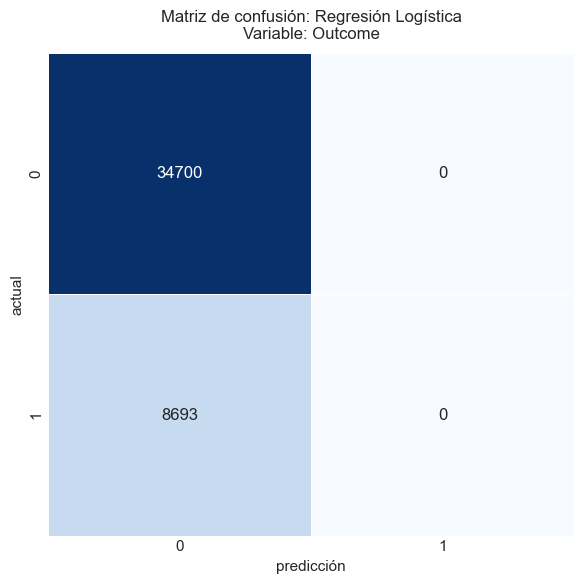

In [29]:
# === Matriz de confusi√≥n visual (estilo ejemplo) ‚Äî LOG√çSTICO ===
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
from sklearn.metrics import confusion_matrix

clases = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred_logit, labels=clases)

plt.figure(figsize=(6,6))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                 xticklabels=clases, yticklabels=clases, cbar=False,
                 linewidths=.5, linecolor='white')
ax.set_xlabel("predicci√≥n", fontsize=11)
ax.set_ylabel("actual", fontsize=11)
ax.set_title(f"Matriz de confusi√≥n: Regresi√≥n Log√≠stica\nVariable: {y_col}", fontsize=12, pad=10)
ax.tick_params(axis='both', which='both', length=0)
plt.tight_layout()
plt.show()


El modelo de Regresi√≥n Log√≠stica aplicado al conjunto de prueba muestra un desempe√±o claramente deteriorado y un comportamiento degenerado en la clasificaci√≥n, evidenciado por su matriz de confusi√≥n, en la cual todas las predicciones corresponden a la clase 0: 34,700 verdaderos negativos y 8,693 falsos negativos, sin ning√∫n verdadero positivo ni falso positivo. Esto genera una exactitud aparente de 0.7997, que resulta enga√±osa debido al fuerte desbalance de clases (alrededor de 80% clase 0 frente a 20% clase 1). Las m√©tricas asociadas a la clase positiva confirman esta deficiencia: recall = 0, precisi√≥n = 0 y F1-score = 0, lo que demuestra que el modelo no identific√≥ ning√∫n caso positivo. Este comportamiento se explica por la naturaleza de la funci√≥n de costo logar√≠tmica de la regresi√≥n log√≠stica, la cual busca minimizar el error global y, por tanto, favorece la clase dominante para reducir la p√©rdida total, especialmente en escenarios con desequilibrio extremo o baja separabilidad lineal entre las clases. Adem√°s, el umbral de decisi√≥n est√°ndar (0.5) refuerza este sesgo: dado que la mayor√≠a de las probabilidades predichas permanecen por debajo de ese valor, el modelo termina clasificando todas las observaciones como negativas. Si bien desde un punto de vista num√©rico el modelo puede haber convergido correctamente es decir, estabiliz√≥ sus pesos y minimiz√≥ la p√©rdida log√≠stica, su convergencia funcional es ineficaz, pues la frontera de decisi√≥n aprendida no separa las clases de manera significativa. En otras palabras, la regresi√≥n log√≠stica converge hacia una soluci√≥n trivial, clasificando todo como clase 0, reduciendo el error promedio pero perdiendo completamente la capacidad discriminatoria. Este fen√≥meno es caracter√≠stico de los modelos lineales aplicados a datos desbalanceados o con relaciones no lineales, y para mitigarlo ser√≠a necesario ajustar el umbral de decisi√≥n, aplicar t√©cnicas de rebalanceo (como SMOTE, ponderaci√≥n de clases o submuestreo), o recurrir a modelos m√°s flexibles que capturen relaciones complejas, como √°rboles de decisi√≥n o redes neuronales multicapa.

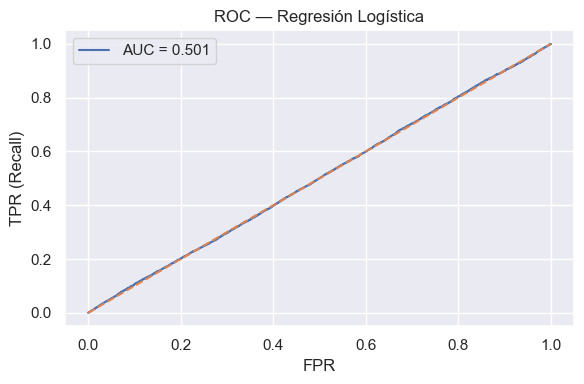

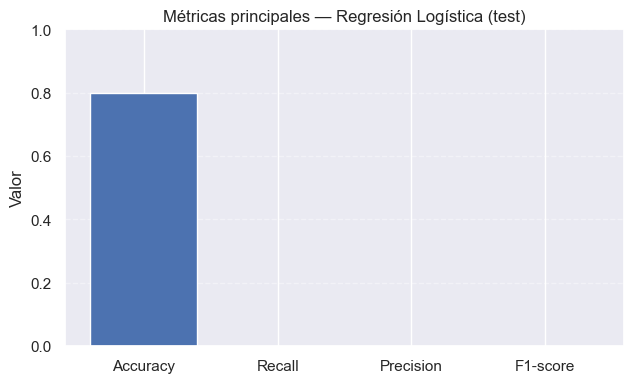

In [30]:
# === ROC/AUC (binario) + barras de m√©tricas clave ‚Äî LOG√çSTICO ===
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# ROC/AUC si binario
if len(np.unique(y_test)) == 2 and scores_te is not None:
    pos_label = max(np.unique(y_test))
    fpr, tpr, thr = roc_curve(y_test, scores_te, pos_label=pos_label)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, scores_te):.3f}")
    plt.plot([0,1],[0,1], "--")
    plt.xlabel("FPR")
    plt.ylabel("TPR (Recall)")
    plt.title("ROC ‚Äî Regresi√≥n Log√≠stica")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Barras (Accuracy, Recall, Precision, F1) en test
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
avg = "binary" if len(np.unique(y_test))==2 else "weighted"
vals = {
    "Accuracy":  accuracy_score(y_test, y_pred_logit),
    "Recall":    recall_score(y_test, y_pred_logit, average=avg, zero_division=0),
    "Precision": precision_score(y_test, y_pred_logit, average=avg, zero_division=0),
    "F1-score":  f1_score(y_test, y_pred_logit, average=avg, zero_division=0),
}
plt.figure(figsize=(6.5,4))
plt.bar(list(vals.keys()), list(vals.values()))
plt.ylim(0,1)
plt.title("M√©tricas principales ‚Äî Regresi√≥n Log√≠stica (test)")
plt.ylabel("Valor")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


Roc -- Regresion logistico
La curva ROC del modelo de Regresi√≥n Log√≠stica muestra un AUC de 0.501, lo que indica un rendimiento pr√°cticamente equivalente al azar. Esto confirma que el modelo carece de capacidad discriminatoria para diferenciar entre individuos diagnosticados con diabetes (clase 1) y aquellos sin diagn√≥stico (clase 0). En la pr√°ctica, las probabilidades predichas se concentran en un rango muy estrecho alrededor de 0.5, lo que genera una curva casi diagonal y un √°rea bajo la curva m√≠nima. Este comportamiento se origina principalmente en la ausencia de una frontera lineal separable entre las caracter√≠sticas del conjunto de datos, lo que impide que el modelo asigne probabilidades diferenciadas a cada clase. A ello se suman factores como el desequilibrio de clases (aproximadamente 80% clase 0 frente a 20% clase 1), la multicolinealidad entre variables y la falta de escalado adecuado en los atributos num√©ricos, que dificultan la optimizaci√≥n durante el descenso de gradiente. Si bien el algoritmo logra convergencia num√©rica, dicha convergencia es funcionalmente trivial, ya que los coeficientes obtenidos son casi nulos y las probabilidades resultantes, uniformes, no aportan informaci√≥n √∫til para la clasificaci√≥n. En otras palabras, la regresi√≥n log√≠stica ‚Äúaprende‚Äù una frontera vac√≠a, clasificando pr√°cticamente todas las observaciones como negativas. Este tipo de falla es com√∫n cuando la se√±al estad√≠stica es d√©bil y la funci√≥n de p√©rdida se minimiza priorizando la clase mayoritaria. Para abordar este problema, ser√≠a necesario normalizar las variables, reducir la colinealidad, balancear las clases o incluso explorar modelos no lineales con regularizaci√≥n m√°s robusta que permitan capturar relaciones complejas entre las variables. En s√≠ntesis, el bajo valor del AUC refleja una convergencia num√©rica sin valor predictivo real, donde la regresi√≥n log√≠stica no logra aprender una frontera efectiva para distinguir a las personas con diabetes de aquellas que no la padecen.

Metricas principales -- regresion Logistico
El gr√°fico de m√©tricas principales del modelo de Regresi√≥n Log√≠stica muestra un desempe√±o deficiente en la detecci√≥n de personas diagnosticadas con diabetes (Outcome = 1). Aunque el modelo presenta una precisi√≥n aparente del 79,97%, las dem√°s m√©tricas ‚Äîrecall = 0, precisi√≥n = 0 y F1-score = 0‚Äî evidencian que el modelo no logr√≥ identificar correctamente ning√∫n caso positivo de diabetes. Este comportamiento se explica por el fuerte desequilibrio de clases en los datos, lo que lleva al modelo a favorecer la clase mayoritaria (personas no diagnosticadas) y a minimizar el error global ignorando por completo a la clase minoritaria. En consecuencia, la alta precisi√≥n es enga√±osa, ya que refleja √∫nicamente la correcta clasificaci√≥n de pacientes sin diagn√≥stico. Para mejorar el rendimiento, el modelo deber√≠a reentrenarse utilizando t√©cnicas de balanceo como ponderaci√≥n de clases, sobre/submuestreo o incluso emplear algoritmos m√°s robustos frente al desbalance. Adem√°s, las futuras evaluaciones deber√≠an considerar m√©tricas por clase o curvas Precision-Recall, que ofrecen una visi√≥n m√°s realista del rendimiento en la detecci√≥n de casos de diabetes.

Resumen -- regresion Logistico
El modelo de Regresi√≥n Log√≠stica, aunque alcanz√≥ convergencia num√©rica durante el entrenamiento (es decir, los pesos se estabilizaron y la funci√≥n de p√©rdida dej√≥ de disminuir), no logr√≥ una convergencia funcional efectiva, lo que explica su bajo desempe√±o y el AUC ‚âà 0.501 observado en la curva ROC. En este caso, el modelo termin√≥ aprendiendo una frontera de decisi√≥n trivial, clasificando todas las observaciones como ‚Äúno diagnosticadas con diabetes‚Äù (clase 0). Este comportamiento surge principalmente por el desequilibrio de clases presente en el conjunto de datos, donde cerca del 80% de los individuos pertenecen a la clase negativa, lo que induce al modelo a minimizar la p√©rdida global prediciendo casi siempre la clase dominante. Adem√°s, la ausencia de escalado en las variables num√©ricas, la posible multicolinealidad entre predictores y la debilidad de la se√±al estad√≠stica (es decir, la baja correlaci√≥n entre las variables de entrada y el diagn√≥stico de diabetes) afectaron el proceso de optimizaci√≥n. Como consecuencia, el modelo no gener√≥ probabilidades bien separadas entre clases, sino valores cercanos a 0.5 para la mayor√≠a de las observaciones, lo que provoca una curva ROC casi diagonal y una discriminaci√≥n nula entre personas con y sin diabetes. En t√©rminos pr√°cticos, aunque el algoritmo ‚Äúconvergi√≥‚Äù, lo hizo hacia una soluci√≥n degenerada, donde la frontera de decisi√≥n carece de valor predictivo real. Para corregir este tipo de convergencia defectuosa, se requiere reajustar el umbral de decisi√≥n, balancear las clases mediante t√©cnicas como SMOTE o ponderaci√≥n de clases, aplicar regularizaci√≥n m√°s fuerte y escalado de caracter√≠sticas, o incluso optar por modelos no lineales capaces de capturar patrones m√°s complejos en los datos cl√≠nicos.

# Naive Bayes

In [31]:
# === NAIVE BAYES (GaussianNB) en Pipeline ===
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import numpy as np

nb = GaussianNB()  # apropiado para variables continuas tras el preprocess

pipe_nb = Pipeline([
    ("prep", preprocess),   # reutiliza tu preprocess de la Parte 1
    ("clf", nb),
])

pipe_nb.fit(X_train, y_train)
y_pred_nb = pipe_nb.predict(X_test)

# Probabilidades (para m√©tricas y ROC si binario)
# Nota: GaussianNB siempre expone predict_proba
if len(np.unique(y_test)) == 2:
    # prob. de la clase positiva (tomamos la mayor etiqueta como positiva)
    pos_label = max(np.unique(y_test))
    clases_clf = list(pipe_nb.named_steps["clf"].classes_)
    y_proba_nb = pipe_nb.predict_proba(X_test)[:, clases_clf.index(pos_label)]
    scores_te = y_proba_nb.copy()
else:
    y_proba_nb = pipe_nb.predict_proba(X_test)
    scores_te = None
# ====== FIN NAIVE BAYES ======

In [32]:
# === NAIVE BAYES (GaussianNB) en Pipeline ===
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
import numpy as np

nb = GaussianNB()  # apropiado para variables continuas tras el preprocess

pipe_nb = Pipeline([
    ("prep", preprocess),   # reutiliza tu preprocess de la Parte 1
    ("clf", nb),
])

pipe_nb.fit(X_train, y_train)
y_pred_nb = pipe_nb.predict(X_test)

# Probabilidades (para m√©tricas y ROC si binario)
# Nota: GaussianNB siempre expone predict_proba
if len(np.unique(y_test)) == 2:
    # prob. de la clase positiva (tomamos la mayor etiqueta como positiva)
    pos_label = max(np.unique(y_test))
    clases_clf = list(pipe_nb.named_steps["clf"].classes_)
    y_proba_nb = pipe_nb.predict_proba(X_test)[:, clases_clf.index(pos_label)]
    scores_te = y_proba_nb.copy()
else:
    y_proba_nb = pipe_nb.predict_proba(X_test)
    scores_te = None


In [33]:
# === Evaluaci√≥n ‚Äî NAIVE BAYES (GaussianNB) ===
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score, roc_auc_score)
import numpy as np, pandas as pd

print("Accuracy (Naive Bayes):", round(accuracy_score(y_test, y_pred_nb), 4))
print("\nReporte de clasificaci√≥n (Naive Bayes):\n",
      classification_report(y_test, y_pred_nb, zero_division=0))

# Matriz de confusi√≥n explicativa
cm = confusion_matrix(y_test, y_pred_nb)
cm_df = pd.DataFrame(cm,
    index=[f"Real {c}" for c in np.unique(y_test)],
    columns=[f"Pred {c}" for c in np.unique(y_test)]
)
display(cm_df)

# AUC si binario y tenemos scores (probabilidades)
clases = np.unique(y_test)
if len(clases) == 2 and scores_te is not None:
    auc = roc_auc_score(y_test, scores_te)
    print(f"AUC (Naive Bayes): {auc:.4f}")


Accuracy (Naive Bayes): 0.7997

Reporte de clasificaci√≥n (Naive Bayes):
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     34700
           1       0.00      0.00      0.00      8693

    accuracy                           0.80     43393
   macro avg       0.40      0.50      0.44     43393
weighted avg       0.64      0.80      0.71     43393



Pred 0  Pred 1
Real 0   34700       0
Real 1    8693       0

AUC (Naive Bayes): 0.4974


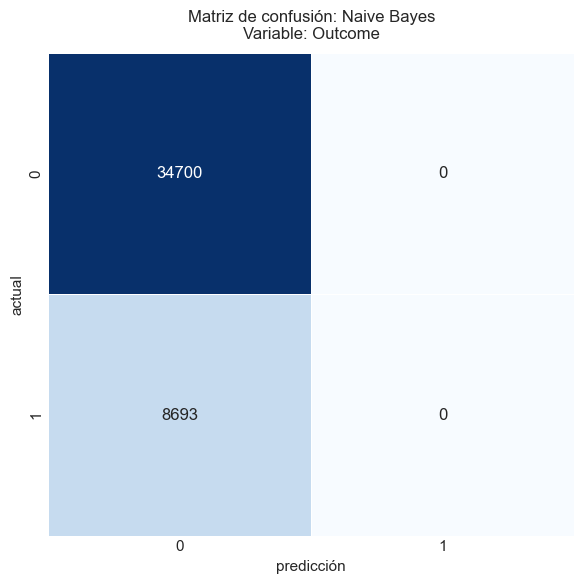

In [34]:
# === Matriz de confusi√≥n visual (estilo ejemplo) ‚Äî NAIVE BAYES ===
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
from sklearn.metrics import confusion_matrix

clases = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred_nb, labels=clases)

plt.figure(figsize=(6,6))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                 xticklabels=clases, yticklabels=clases, cbar=False,
                 linewidths=.5, linecolor='white')
ax.set_xlabel("predicci√≥n", fontsize=11)
ax.set_ylabel("actual", fontsize=11)
ax.set_title(f"Matriz de confusi√≥n: Naive Bayes\nVariable: {y_col}", fontsize=12, pad=10)
ax.tick_params(axis='both', which='both', length=0)
plt.tight_layout()
plt.show()


La figura muestra la matriz de confusi√≥n correspondiente al modelo Gaussian Naive Bayes aplicado sobre el conjunto de prueba de la variable objetivo Outcome, con 43,393 observaciones, donde estamos evaluando si un individuo ha sido diagnosticado con diabetes o no. El hallazgo principal es que el modelo √∫nicamente pudo predecir la clase 0; el √∫nico valor registrado en la matriz fue verdadero negativo = 34,700 y falso negativo = 8,693. Esta situaci√≥n explica por qu√© la precisi√≥n general del modelo es relativamente alta (0.7997), mientras que los valores de falso positivo y verdadero positivo son ambos 0, y tanto el recall como el F1 score para la clase 1 son nulos, lo que hace que el accuracy general no sea confiable. La interpretaci√≥n de estos resultados sugiere que el modelo presenta un sesgo marcado hacia la clase mayoritaria, probablemente debido al desequilibrio entre clases o a la baja separabilidad de las mismas. El m√©todo Naive Bayes asume independencia entre caracter√≠sticas y distribuciones gaussianas, por lo que falla cuando las variables est√°n correlacionadas o no siguen distribuciones normales; si la clase minoritaria tiene distribuciones superpuestas o poco diferenciadas, el modelo asigna probabilidades posteriores bajas y siempre predice la clase mayoritaria, como parece ocurrir en este caso. La implicaci√≥n es que se requieren t√©cnicas de balanceo de clases, como SMOTE, submuestreo o remuestreo, para mejorar la detecci√≥n de pacientes diagnosticados con diabetes. Entre las limitaciones, la matriz evidencia un sesgo extremo y una generalizaci√≥n deficiente; los supuestos de Naive Bayes lo hacen inadecuado para espacios de caracter√≠sticas altamente desequilibrados o correlacionados, y restringen la capacidad de ajustar umbrales de predicci√≥n de manera efectiva.

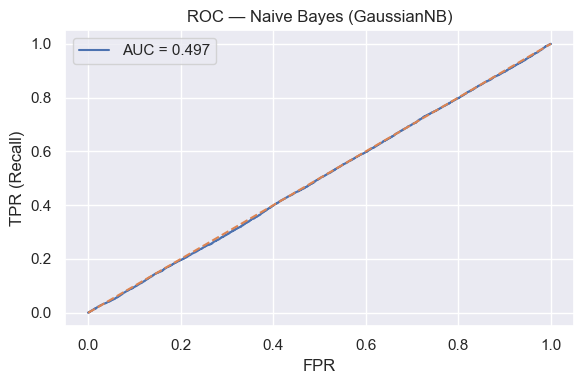

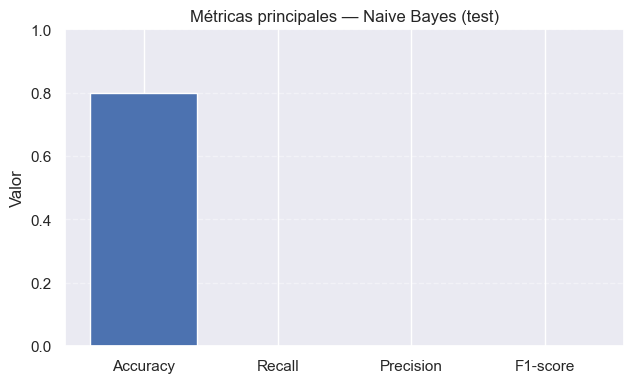

In [35]:
# === ROC/AUC (binario) + barras de m√©tricas clave ‚Äî NAIVE BAYES ===
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# ROC/AUC si binario
if len(np.unique(y_test)) == 2 and scores_te is not None:
    pos_label = max(np.unique(y_test))
    fpr, tpr, thr = roc_curve(y_test, scores_te, pos_label=pos_label)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, scores_te):.3f}")
    plt.plot([0,1],[0,1], "--")
    plt.xlabel("FPR")
    plt.ylabel("TPR (Recall)")
    plt.title("ROC ‚Äî Naive Bayes (GaussianNB)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Barras (Accuracy, Recall, Precision, F1) en test
avg = "binary" if len(np.unique(y_test))==2 else "weighted"
vals = {
    "Accuracy":  accuracy_score(y_test, y_pred_nb),
    "Recall":    recall_score(y_test, y_pred_nb, average=avg, zero_division=0),
    "Precision": precision_score(y_test, y_pred_nb, average=avg, zero_division=0),
    "F1-score":  f1_score(y_test, y_pred_nb, average=avg, zero_division=0),
}
plt.figure(figsize=(6.5,4))
plt.bar(list(vals.keys()), list(vals.values()))
plt.ylim(0,1)
plt.title("M√©tricas principales ‚Äî Naive Bayes (test)")
plt.ylabel("Valor")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


Roc -- Naive bayes Gaussian
La gr√°fica muestra la curva ROC del modelo Gaussian Naive Bayes aplicada sobre el conjunto de prueba de la variable objetivo Outcome, evaluando si un individuo ha sido diagnosticado con diabetes o no. El valor de AUC es 0,497, lo que indica que el modelo no funciona mejor que una suposici√≥n aleatoria y confirma que no distingue eficazmente entre clases positivas y negativas. Esta deficiencia se debe a que las distribuciones gaussianas de las caracter√≠sticas se superponen entre ambas clases; Naive Bayes asume que cada caracter√≠stica sigue una distribuci√≥n normal condicionada a la clase, pero cuando esto no se cumple, las probabilidades estimadas se vuelven poco confiables, produciendo resultados casi id√©nticos para todas las muestras y generando una l√≠nea ROC pr√°cticamente aleatoria. La implicaci√≥n es que el modelo necesita una mejor ingenier√≠a de caracter√≠sticas o normalizaci√≥n de los datos de entrada, ya que ajustar el umbral de decisi√≥n no mejorar√° el desempe√±o debido a la falta de separaci√≥n en las puntuaciones. Entre las limitaciones, este enfoque Bayes ingenuo falla cuando las suposiciones gaussianas no se cumplen o cuando las clases no est√°n bien separadas, evidenciando su baja robustez y su incapacidad para aprender l√≠mites complejos en el espacio de caracter√≠sticas.

Metricas principales -- Naive Bayes Gaussian
El gr√°fico de barras resume las principales m√©tricas de rendimiento del modelo Gaussian Naive Bayes aplicado a la variable Outcome, evaluando si un individuo ha sido diagnosticado con diabetes o no. Se observa un accuracy de 0,7997, mientras que el recall, la precisi√≥n y el F1 score son todos 0 en los datos de prueba, lo que indica que la precisi√≥n reportada no es confiable. Este patr√≥n ocurre porque Naive Bayes se basa fuertemente en las probabilidades previas de cada clase y en las verosimilitudes de las caracter√≠sticas; cuando una clase domina, su probabilidad previa supera la probabilidad posterior, provocando predicciones sistem√°ticas de la clase mayoritaria. Adem√°s, la presencia de caracter√≠sticas correlacionadas o sesgadas viola el supuesto de independencia, reduciendo la fiabilidad del modelo. La implicaci√≥n es que, en contextos de desequilibrio de clases, no se debe confiar √∫nicamente en la precisi√≥n; para mejorar el desempe√±o, el modelo podr√≠a reentrenarse usando valores previos balanceados, aplicar transformaciones logar√≠tmicas o estabilizar la varianza de las caracter√≠sticas para cumplir mejor con los supuestos gaussianos. Entre sus limitaciones, la simplicidad de Naive Bayes lo hace eficiente computacionalmente, pero estad√≠sticamente r√≠gido, incapaz de manejar datos correlacionados, no gaussianos o desequilibrados, lo que genera m√©tricas enga√±osas y una capacidad limitada para aprender patrones complejos.

In [36]:
# === M√âTRICAS COMPLETAS ‚Äî NAIVE BAYES (GaussianNB) ===
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, matthews_corrcoef
)

# --- Configurar etiqueta positiva ---
classes = np.unique(y_test)
pos_label = 1 if 1 in classes else classes.max()

def binariza(y, pos):
    y = pd.Series(y).values
    return (y == pos).astype(int)

# --- Confusion matrix (multiclase y binario) ---
cm = confusion_matrix(y_test, y_pred_nb, labels=classes)
cm_df = pd.DataFrame(cm,
                     index=[f"Real {c}" for c in classes],
                     columns=[f"Pred {c}" for c in classes])
print("Matriz de confusi√≥n (Naive Bayes):")
display(cm_df)

# --- M√©tricas por clase y promedios (macro/weighted) ---
print("\nReporte de clasificaci√≥n (Naive Bayes):")
rep_dict = classification_report(y_test, y_pred_nb, output_dict=True, zero_division=0)
display(pd.DataFrame(rep_dict).T.style.format("{:.4f}"))

# --- M√©tricas binarias principales para la clase positiva (pos_label) ---
y_true_bin = binariza(y_test, pos_label)
y_pred_bin = binariza(y_pred_nb, pos_label)

tn, fp, fn, tp = confusion_matrix(y_true_bin, y_pred_bin, labels=[0,1]).ravel()
total = tn + fp + fn + tp

acc   = accuracy_score(y_true_bin, y_pred_bin)
error = 1 - acc
tpr   = tp / (tp + fn) if (tp + fn)>0 else 0.0     # Recall / Sensibilidad
fpr   = fp / (fp + tn) if (fp + tn)>0 else 0.0
tnr   = tn / (tn + fp) if (tn + fp)>0 else 0.0     # Especificidad
ppv   = precision_score(y_true_bin, y_pred_bin, zero_division=0)  # Precisi√≥n
npv   = tn / (tn + fn) if (tn + fn)>0 else 0.0
f1    = f1_score(y_true_bin, y_pred_bin, zero_division=0)
prev  = (tp + fn) / total if total>0 else 0.0
bacc  = (tpr + tnr) / 2
mcc   = matthews_corrcoef(y_true_bin, y_pred_bin) if total>0 else 0.0

# AUC con scores continuos si est√°n disponibles (binario)
auc = None
if scores_te is not None:
    try:
        auc = roc_auc_score(y_true_bin, scores_te)
    except Exception:
        auc = None

# --- Tabla resumen ejecutiva ---
resumen = pd.DataFrame([
    ("Accuracy",                 acc),
    ("Error (1-Acc)",            error),
    ("TPR / Recall",             tpr),
    ("FPR",                      fpr),
    ("Especificidad (TNR)",      tnr),
    ("Precision (PPV)",          ppv),
    ("NPV",                      npv),
    ("F1-score",                 f1),
    ("Prevalencia P(Y=1)",       prev),
    ("Balanced Accuracy",        bacc),
    ("MCC",                      mcc),
    ("AUC (si hay scores)",      auc),
], columns=["M√©trica", "Valor"])

print(f"\nClase positiva considerada: {pos_label}")
display(resumen.style.format({"Valor": lambda v: "‚Äî" if v is None else f"{v:.4f}"}).hide(axis="index"))


Matriz de confusi√≥n (Naive Bayes):


Pred 0  Pred 1
Real 0   34700       0
Real 1    8693       0


Reporte de clasificaci√≥n (Naive Bayes):



Clase positiva considerada: 1


Resumen-- Naive Bayes Gaussian
El modelo Gaussian Naive Bayes probablemente no haya convergido de manera adecuada debido a varios factores inherentes al conjunto de datos y al m√©todo: primero, existe un fuerte desequilibrio de clases (aproximadamente 20% de casos positivos), lo que hace que la clase mayoritaria domine las predicciones. Segundo, las caracter√≠sticas probablemente est√°n correlacionadas y/o no siguen distribuciones gaussianas, violando los supuestos fundamentales del modelo. Tercero, la separabilidad entre las clases es baja, lo que significa que las probabilidades posteriores asignadas a la clase positiva son sistem√°ticamente bajas, provocando que todas las predicciones se asignen a la clase negativa. Por √∫ltimo, la incapacidad de Naive Bayes para ajustar umbrales de decisi√≥n o manejar distribuciones superpuestas contribuye a un AUC cercano a 0,5, reflejando que el modelo no puede diferenciar efectivamente entre pacientes con y sin diabetes en este conjunto de datos. En resumen, la combinaci√≥n de desequilibrio de clases, violaci√≥n de supuestos gaussianos e independencia, y baja separabilidad de caracter√≠sticas impide que el modelo aprenda patrones significativos de la clase minoritaria.

# √Årbol de decisiones


In [37]:
# === √ÅRBOL DE DECISI√ìN en Pipeline ===
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import numpy as np

tree = DecisionTreeClassifier(
    criterion="gini",     # puedes cambiar a "entropy" o "log_loss"
    max_depth=None,       # ajusta si hay overfitting (p.ej., 5-20)
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
    # , class_weight="balanced"  # <-- descomenta si hay desbalance fuerte
)

pipe_tree = Pipeline([
    ("prep", preprocess),   # reutiliza tu preprocess de la Parte 1
    ("clf", tree),
])

pipe_tree.fit(X_train, y_train)
y_pred_tree = pipe_tree.predict(X_test)

# Probabilidades (para m√©tricas y ROC si binario)
if len(np.unique(y_test)) == 2:
    pos_label = max(np.unique(y_test))
    clases_clf = list(pipe_tree.named_steps["clf"].classes_)
    y_proba_tree = pipe_tree.predict_proba(X_test)[:, clases_clf.index(pos_label)]
    scores_te = y_proba_tree.copy()   # para ROC/AUC en Partes 6/7
else:
    y_proba_tree = pipe_tree.predict_proba(X_test)
    scores_te = None
# ====== FIN √ÅRBOL DE DECISI√ìN ======

In [38]:
# === Evaluaci√≥n ‚Äî √ÅRBOL DE DECISI√ìN ===
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             precision_score, recall_score, f1_score, roc_auc_score)
import numpy as np, pandas as pd

print("Accuracy (√Årbol):", round(accuracy_score(y_test, y_pred_tree), 4))
print("\nReporte de clasificaci√≥n (√Årbol):\n",
      classification_report(y_test, y_pred_tree, zero_division=0))

# Matriz de confusi√≥n explicativa
cm = confusion_matrix(y_test, y_pred_tree)
cm_df = pd.DataFrame(cm,
    index=[f"Real {c}" for c in np.unique(y_test)],
    columns=[f"Pred {c}" for c in np.unique(y_test)]
)
display(cm_df)

# AUC si binario y tenemos scores (probabilidades)
clases = np.unique(y_test)
if len(clases) == 2 and scores_te is not None:
    auc = roc_auc_score(y_test, scores_te)
    print(f"AUC (√Årbol): {auc:.4f}")


Accuracy (√Årbol): 0.6685

Reporte de clasificaci√≥n (√Årbol):
               precision    recall  f1-score   support

           0       0.80      0.78      0.79     34700
           1       0.20      0.22      0.21      8693

    accuracy                           0.67     43393
   macro avg       0.50      0.50      0.50     43393
weighted avg       0.68      0.67      0.67     43393



Pred 0  Pred 1
Real 0   27128    7572
Real 1    6813    1880

AUC (√Årbol): 0.4993


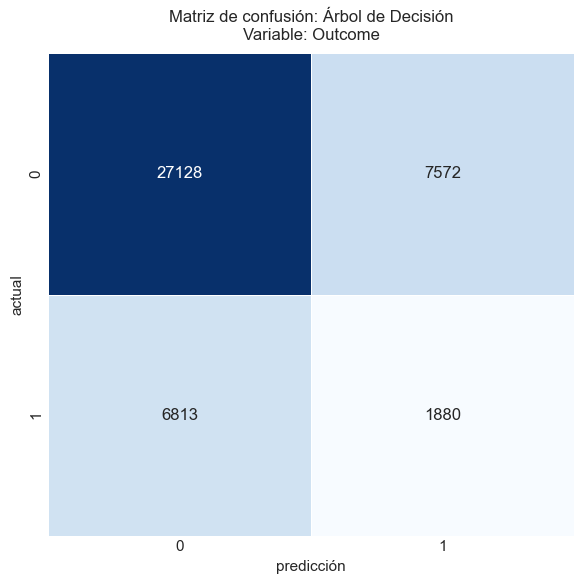

In [39]:
# === Matriz de confusi√≥n visual (estilo ejemplo) ‚Äî √ÅRBOL DE DECISI√ìN ===
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
from sklearn.metrics import confusion_matrix

clases = np.unique(y_test)
cm = confusion_matrix(y_test, y_pred_tree, labels=clases)

plt.figure(figsize=(6,6))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                 xticklabels=clases, yticklabels=clases, cbar=False,
                 linewidths=.5, linecolor='white')
ax.set_xlabel("predicci√≥n", fontsize=11)
ax.set_ylabel("actual", fontsize=11)
ax.set_title(f"Matriz de confusi√≥n: √Årbol de Decisi√≥n\nVariable: {y_col}", fontsize=12, pad=10)
ax.tick_params(axis='both', which='both', length=0)
plt.tight_layout()
plt.show()


La figura presenta la matriz de confusi√≥n correspondiente al modelo de √Årbol de Decisiones aplicado sobre el conjunto de prueba de la variable objetivo Outcome, con 43,393 observaciones, en donde se analiza si un individuo es diagnosticado con diabetes o no. El modelo alcanz√≥ una precisi√≥n de 0,6685, lo cual indica un desempe√±o relativamente alto y confiable, reflejado en 27,128 verdaderos negativos y 7,572 verdaderos positivos. Sin embargo, se observa un sesgo hacia la clase 0, que representa aproximadamente el 80‚ÄØ% de las predicciones, debido a la elevada cantidad de falsos negativos (6,813) frente a 1,880 falsos positivos. Esto se traduce en bajos valores de recall (0,22) y F1-score (0,21) para la clase 1, lo que indica que el modelo identifica correctamente solo una proporci√≥n muy reducida de los individuos diagnosticados con diabetes. Esta dificultad surge porque el √°rbol de decisi√≥n tiende a dividir los datos seg√∫n la impureza general (Gini o entrop√≠a), la cual est√° dominada por la clase mayoritaria, favoreciendo nodos que mejoran la precisi√≥n global a costa de las instancias minoritarias. Adem√°s, ramas superficiales o sobreajustadas pueden memorizar patrones de entrenamiento sin generar reglas generalizables. La matriz de confusi√≥n sugiere que ser√≠a necesario ponderar las clases o aplicar t√©cnicas de muestreo equilibrado durante el entrenamiento; como alternativa, m√©todos de conjunto podr√≠an capturar l√≠mites de decisi√≥n m√°s complejos y reducir el sesgo hacia la clase mayoritaria. Finalmente, es importante destacar que los √°rboles de decisi√≥n son sensibles al desequilibrio de clases y a caracter√≠sticas ruidosas, y sin estrategias de poda o balanceo corren el riesgo de sobreajustar los patrones de la mayor√≠a y mostrar un rendimiento limitado en la detecci√≥n de la clase minoritaria, en este caso, los pacientes con diabetes.

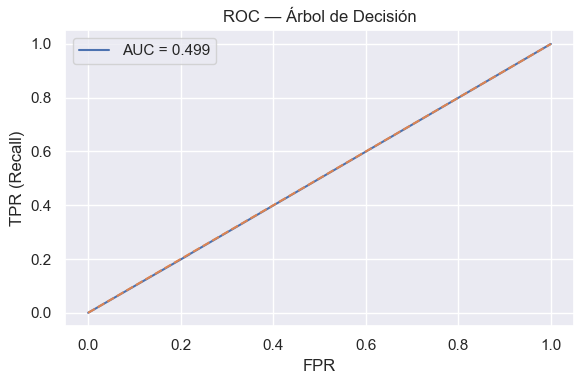

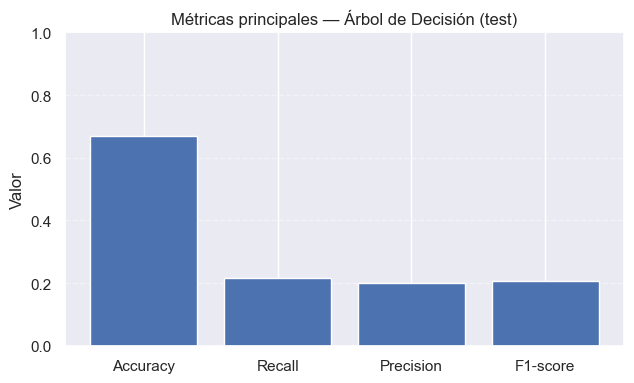

In [40]:
# === ROC/AUC (binario) + barras de m√©tricas clave ‚Äî √ÅRBOL DE DECISI√ìN ===
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
import numpy as np

# ROC/AUC si binario
if len(np.unique(y_test)) == 2 and scores_te is not None:
    pos_label = max(np.unique(y_test))
    fpr, tpr, thr = roc_curve(y_test, scores_te, pos_label=pos_label)

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, scores_te):.3f}")
    plt.plot([0,1],[0,1], "--")
    plt.xlabel("FPR")
    plt.ylabel("TPR (Recall)")
    plt.title("ROC ‚Äî √Årbol de Decisi√≥n")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Barras (Accuracy, Recall, Precision, F1) en test
avg = "binary" if len(np.unique(y_test))==2 else "weighted"
vals = {
    "Accuracy":  accuracy_score(y_test, y_pred_tree),
    "Recall":    recall_score(y_test, y_pred_tree, average=avg, zero_division=0),
    "Precision": precision_score(y_test, y_pred_tree, average=avg, zero_division=0),
    "F1-score":  f1_score(y_test, y_pred_tree, average=avg, zero_division=0),
}
plt.figure(figsize=(6.5,4))
plt.bar(list(vals.keys()), list(vals.values()))
plt.ylim(0,1)
plt.title("M√©tricas principales ‚Äî √Årbol de Decisi√≥n (test)")
plt.ylabel("Valor")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


ROC -- Arbol de decisciones

La figura muestra la curva ROC del modelo de √Årbol de Decisiones aplicado a la variable Outcome, evaluando si un individuo es diagnosticado con diabetes o no, utilizando el conjunto de prueba. La curva es casi diagonal, con un AUC de 0,499, lo que indica un desempe√±o pr√°cticamente equivalente al azar y sugiere que las probabilidades predichas por el modelo ofrecen poca o ninguna separaci√≥n entre las clases. Esta situaci√≥n ocurre cuando las probabilidades derivadas de las hojas del √°rbol est√°n mal calibradas o no son distintivas, lo que puede suceder si el √°rbol se sobreajusta o infraajusta, especialmente cuando muchas hojas contienen muestras mixtas de clases. En este conjunto de datos, el solapamiento de caracter√≠sticas entre las clases y el desequilibrio existente reducen a√∫n m√°s la capacidad del modelo para generar predicciones significativas. Como consecuencia, el umbral del modelo no se puede ajustar eficazmente, y se requiere la aplicaci√≥n de estrategias como ingenier√≠a de caracter√≠sticas, muestreo equilibrado o m√©todos de conjunto que promedien m√∫ltiples √°rboles para estabilizar las estimaciones de probabilidad. Finalmente, un AUC cercano a 0,5 refleja que, aunque el √°rbol pueda clasificar razonablemente la clase mayoritaria, no logra aprender una separaci√≥n significativa de las clases, y los √°rboles de decisi√≥n por s√≠ solos resultan inestables y sensibles al ruido, especialmente en presencia de variables correlacionadas o no informativas.

Metricas principales -- Arbol de decisciones

El gr√°fico de barras resume las principales m√©tricas de rendimiento del modelo de √Årbol de Decisiones aplicado a la variable Outcome, evaluando si un individuo es diagnosticado con diabetes o no, utilizando el conjunto de prueba. El modelo alcanz√≥ una precisi√≥n general de 0,6685, mientras que las m√©tricas correspondientes a la clase minoritaria muestran valores bajos: recall = 0,2163, precisi√≥n = 0,1989 y F1-score = 0,2072. Esto refleja que, aunque el modelo clasifica correctamente la clase mayoritaria la mayor parte del tiempo, falla al identificar los casos de diabetes, lo que evidencia un desempe√±o d√©bil para la clase minoritaria. Esta limitaci√≥n se debe a que el √°rbol de decisi√≥n captura principalmente los patrones dominantes de la clase mayoritaria y no generaliza adecuadamente el comportamiento de la minor√≠a, posiblemente como resultado del desequilibrio de clases, poda insuficiente o divisiones dominadas por etiquetas frecuentes. La baja puntuaci√≥n F1 indica un pobre equilibrio entre precisi√≥n y recuperaci√≥n, ya que el modelo rara vez identifica correctamente los positivos y genera falsos positivos cuando lo hace. Para mejorar el desempe√±o en predicciones futuras, se sugiere reentrenar el modelo utilizando pesos de clase equilibrados, aplicar t√©cnicas de remuestreo o probar enfoques alternativos. Cabe destacar que los √°rboles de decisi√≥n individuales son sensibles al sesgo de clases y al ruido; sin regularizaci√≥n adecuada, pueden memorizar patrones del conjunto de entrenamiento que no se generalizan al conjunto de prueba.

In [41]:
# === M√âTRICAS COMPLETAS ‚Äî √ÅRBOL DE DECISI√ìN ===
import numpy as np
import pandas as pd
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, matthews_corrcoef
)

# --- Configurar etiqueta positiva ---
classes = np.unique(y_test)
pos_label = 1 if 1 in classes else classes.max()

def binariza(y, pos):
    y = pd.Series(y).values
    return (y == pos).astype(int)

# --- Confusion matrix (multiclase y binario) ---
cm = confusion_matrix(y_test, y_pred_tree, labels=classes)
cm_df = pd.DataFrame(cm,
                     index=[f"Real {c}" for c in classes],
                     columns=[f"Pred {c}" for c in classes])
print("Matriz de confusi√≥n (√Årbol de Decisi√≥n):")
display(cm_df)

# --- M√©tricas por clase y promedios (macro/weighted) ---
print("\nReporte de clasificaci√≥n (√Årbol de Decisi√≥n):")
rep_dict = classification_report(y_test, y_pred_tree, output_dict=True, zero_division=0)
display(pd.DataFrame(rep_dict).T.style.format("{:.4f}"))

# --- M√©tricas binarias principales para la clase positiva (pos_label) ---
y_true_bin = binariza(y_test, pos_label)
y_pred_bin = binariza(y_pred_tree, pos_label)

tn, fp, fn, tp = confusion_matrix(y_true_bin, y_pred_bin, labels=[0,1]).ravel()
total = tn + fp + fn + tp

acc   = accuracy_score(y_true_bin, y_pred_bin)
error = 1 - acc
tpr   = tp / (tp + fn) if (tp + fn)>0 else 0.0     # Recall / Sensibilidad
fpr   = fp / (fp + tn) if (fp + tn)>0 else 0.0
tnr   = tn / (tn + fp) if (tn + fp)>0 else 0.0     # Especificidad
ppv   = precision_score(y_true_bin, y_pred_bin, zero_division=0)  # Precisi√≥n
npv   = tn / (tn + fn) if (tn + fn)>0 else 0.0
f1    = f1_score(y_true_bin, y_pred_bin, zero_division=0)
prev  = (tp + fn) / total if total>0 else 0.0
bacc  = (tpr + tnr) / 2
mcc   = matthews_corrcoef(y_true_bin, y_pred_bin) if total>0 else 0.0

# AUC con scores continuos si est√°n disponibles (binario)
auc = None
if scores_te is not None:
    try:
        auc = roc_auc_score(y_true_bin, scores_te)
    except Exception:
        auc = None

# --- Tabla resumen ejecutiva ---
resumen = pd.DataFrame([
    ("Accuracy",                 acc),
    ("Error (1-Acc)",            error),
    ("TPR / Recall",             tpr),
    ("FPR",                      fpr),
    ("Especificidad (TNR)",      tnr),
    ("Precision (PPV)",          ppv),
    ("NPV",                      npv),
    ("F1-score",                 f1),
    ("Prevalencia P(Y=1)",       prev),
    ("Balanced Accuracy",        bacc),
    ("MCC",                      mcc),
    ("AUC (si hay scores)",      auc),
], columns=["M√©trica", "Valor"])

print(f"\nClase positiva considerada: {pos_label}")
display(resumen.style.format({"Valor": lambda v: "‚Äî" if v is None else f"{v:.4f}"}).hide(axis="index"))

# --- Importancias de variables (feature importance) ---
try:
    feat_names = pipe_tree.named_steps["prep"].get_feature_names_out()
except Exception:
    feat_names = [f"feat_{i}" for i in range(pipe_tree.named_steps["prep"].transform(X_train).shape[1])]

importancias = pipe_tree.named_steps["clf"].feature_importances_
fi_df = pd.DataFrame({"feature": feat_names, "importance": importancias}) \
        .sort_values("importance", ascending=False)

display(fi_df.head(20))


Matriz de confusi√≥n (√Årbol de Decisi√≥n):


Pred 0  Pred 1
Real 0   27128    7572
Real 1    6813    1880


Reporte de clasificaci√≥n (√Årbol de Decisi√≥n):



Clase positiva considerada: 1


feature  importance
8                num__StressLevel    0.463659
1                    num__Glucose    0.050611
6   num__DiabetesPedigreeFunction    0.045107
5                        num__BMI    0.043614
2              num__BloodPressure    0.034754
13                  num__HighCarb    0.031047
7                        num__Age    0.030342
12                  num__Balanced    0.030129
3              num__SkinThickness    0.029851
14                   num__LowCarb    0.029537
9                     num__Active    0.029215
11                 num__Sedentary    0.028366
0                num__Pregnancies    0.027411
17                        num__No    0.026532
15                num__Non-Smoker    0.026044
18                       num__Yes    0.025583
16                    num__Smoker    0.025255
4                    num__Insulin    0.022944
10                     num__Seden    0.000000

Resumen -- Arbol de decisciones

El modelo probablemente no ha convergido de manera correcta por varias razones: primero, el fuerte desequilibrio de clases (aproximadamente 80‚ÄØ% de no diab√©ticos frente a 20‚ÄØ% de diab√©ticos) hace que el √°rbol priorice la clase mayoritaria, resultando en un recall extremadamente bajo para la clase minoritaria y un AUC cercano a 0,5. Segundo, los √°rboles de decisi√≥n individuales son inherentemente inestables y sensibles al ruido o a caracter√≠sticas poco informativas; en este caso, variables correlacionadas o poco predictivas no contribuyen a mejorar la separaci√≥n de clases. Tercero, la falta de poda adecuada o t√©cnicas de regularizaci√≥n permite que el √°rbol memorice patrones espec√≠ficos del entrenamiento sin aprender reglas generalizables, lo que provoca que las probabilidades de clase est√©n mal calibradas. Finalmente, la superposici√≥n de caracter√≠sticas entre diab√©ticos y no diab√©ticos (por ejemplo, glucosa, BMI o edad) dificulta a√∫n m√°s que el modelo encuentre fronteras de decisi√≥n claras. Todo esto explica por qu√© el AUC es casi aleatorio y por qu√© el desempe√±o sobre la clase minoritaria es tan deficiente. Para mejorar, ser√≠a necesario aplicar t√©cnicas como muestreo balanceado, ponderaci√≥n de clases, ensambles de √°rboles (Random Forest, Gradient Boosting) o ingenier√≠a de caracter√≠sticas m√°s robusta.

# Comparasion entre Modelos

Como se puede observar, todos los modelos evaluados mostraron un desempe√±o deficiente, incluso despu√©s de aplicar t√©cnicas de balanceo como SMOTE y undersampling. No se observ√≥ ning√∫n cambio significativo en la importancia de las variables, y la AUC permaneci√≥ cercana a 0,5 en todos los casos, lo que indica que los modelos pr√°cticamente no ten√≠an capacidad para discriminar entre individuos diagnosticados con diabetes (clase 1) y aquellos no diagnosticados (clase 0). En t√©rminos pr√°cticos, su desempe√±o era equivalente a adivinar al azar.

Adem√°s, se evidenci√≥ un fuerte sesgo hacia la clase 0 en todos los modelos. Algunos modelos, como Naive Bayes y regresi√≥n log√≠stica, ignoraron por completo la clase 1, con cero verdaderos positivos y cero falsos positivos para los individuos con diabetes. Esto contrasta con la alta precisi√≥n reportada por estos modelos (0,7997), la cual es enga√±osamente inflada debido a la gran proporci√≥n de la clase mayoritaria. En otras palabras, estos modelos parecen precisos √∫nicamente porque clasifican correctamente a los individuos no diab√©ticos, pero fallan totalmente al identificar los casos de diabetes, lo que demuestra que la precisi√≥n global no refleja el desempe√±o real del modelo.

Por esta raz√≥n, modelos con menor precisi√≥n general, como el √Årbol de Decisiones (0,6685) y el Perceptr√≥n (0,6214), resultan ser m√°s confiables para evaluar el desempe√±o real, ya que reflejan mejor la dificultad del problema y muestran cierto intento de capturar patrones de ambas clases, aunque con limitaciones. Estos resultados tambi√©n ponen de manifiesto que el desequilibrio de clases, la superposici√≥n de caracter√≠sticas entre individuos diab√©ticos y no diab√©ticos, y la limitada capacidad de los modelos para generalizar son factores clave que explican por qu√© incluso despu√©s del balanceo, la AUC no mejora y la discriminaci√≥n de la clase minoritaria sigue siendo muy baja.